# I. 테스트 데이터 생성

In [1]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-03-04 10:46:03.161768: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-04 10:46:03.261904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-04 10:46:04.927437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-03-04 10:46:06.943201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-04 10:46:06.987859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-04 10:46:06.995781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
tf.config.set_visible_devices([], 'GPU')

2025-03-04 10:46:08.299645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-04 10:46:08.301439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-04 10:46:08.303118: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
df_balanced_odd = pd.read_csv('combined_test_data_200.csv')

In [5]:
df_balanced_odd.tail(5)

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
3752,7.동물_21233.wav,7.동물_21233_1.wav,2.00,22.464,생활소음,동물,개,73,정상,개,...,0.163678,0.978441,0.545665,0.214506,-0.904289,-0.905006,-1.461157,-1.331534,-1.081596,-0.768962
3753,7.동물_49714.wav,7.동물_49714_1.wav,2.00,12.311,생활소음,동물,개,80,정상,개,...,0.136369,-0.835893,1.483713,0.096528,0.914111,-0.760042,-0.644359,1.176192,0.465000,1.438253
3754,7.동물_50077.wav,7.동물_50077_1.wav,2.00,26.916,생활소음,동물,개,52,정상,개,...,-0.873561,-1.316911,-1.918315,-0.122976,0.112075,-0.384172,0.718058,1.504387,0.550436,0.147882
3755,7.동물_49929.wav,7.동물_49929_1.wav,2.00,29.847,생활소음,동물,개,118,정상,개,...,-0.692830,-0.751875,-0.272646,0.166117,-0.828950,-1.689774,-1.097977,-1.704201,-1.078815,-1.519851
3756,7.동물_93791.wav,7.동물_93791_1.wav,2.55,5.780,생활소음,동물,개,121,정상,개,...,1.255837,1.948457,1.149736,-0.214424,-0.473664,-0.758053,-1.192869,-2.213222,-2.408570,-2.331245


In [6]:
# df_balanced_odd에서 실제 라벨을 기준으로 정상 데이터와 기타 소음 라벨링
valid_labels = ['차량경적', '차량주행음', '이륜차경적', '이륜차주행음', '차량사이렌']  # 정상 라벨

# 'category_03' 컬럼이 정상 라벨이면 그대로 두고, 그렇지 않으면 '기타소음'으로 설정
df_balanced_odd['ood_label'] = df_balanced_odd['category_03'].apply(lambda x: x if x in valid_labels else '기타소음')

df_balanced_odd.head(5)

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50,ood_label
0,2.이륜자동차_39554.wav,2.이륜자동차_39554_1.wav,2.0,6.819,교통소음,이륜자동차,이륜차경적,74,정상,이륜차경적,...,-2.771657,-3.069044,1.066370,4.245083,-5.225589,-7.289649,2.418877,7.874488,-2.315581,이륜차경적
1,2.이륜자동차_83873.wav,2.이륜자동차_83873_1.wav,2.0,15.869,교통소음,이륜자동차,이륜차경적,70,정상,이륜차경적,...,7.647911,3.107020,-0.540461,-18.289516,-9.860291,7.296328,0.555939,-19.771233,-15.302324,이륜차경적
2,2.이륜자동차_83258.wav,2.이륜자동차_83258_1.wav,2.0,3.709,교통소음,이륜자동차,이륜차경적,72,정상,이륜차경적,...,-2.682939,9.677195,3.627320,2.622231,-16.344854,-13.719910,4.912110,7.522006,-8.195355,이륜차경적
3,2.이륜자동차_83833.wav,2.이륜자동차_83833_1.wav,2.0,11.257,교통소음,이륜자동차,이륜차경적,74,정상,이륜차경적,...,2.708973,-19.191210,-10.126907,2.869037,10.516963,-21.358089,-20.565630,8.395576,9.915799,이륜차경적
4,2.이륜자동차_84352.wav,2.이륜자동차_84352_1.wav,2.0,3.713,교통소음,이륜자동차,이륜차경적,70,정상,이륜차경적,...,2.228164,8.947879,-13.490410,-14.938594,8.134499,13.541271,-6.587248,-18.457714,-8.395354,이륜차경적


In [7]:
import pandas as pd

# 샘플링할 레이블과 개수 정의
label_counts = {
    '이륜차경적': 100,
    '이륜차주행음': 100,
    '차량경적': 100,
    '차량사이렌': 100,
    '차량주행음': 100,
    '기타소음': 5  # '기타소음' 레이블 개수 조정
}

# 교통 소음 레이블 정의
traffic_noise_labels = list(label_counts.keys())

# 샘플링된 데이터를 저장할 리스트 초기화
sampled_dfs = []

# 교통 소음 레이블 샘플링
for label, count in label_counts.items():
    label_df = df_balanced_odd[df_balanced_odd['ood_label'] == label]
    sampled_label_df = label_df.sample(n=count, random_state=42)
    sampled_dfs.append(sampled_label_df)

# 교통 소음 외 레이블 샘플링 (총 100개)
other_labels = df_balanced_odd['category_03'].unique()
other_labels = [label for label in other_labels if label not in traffic_noise_labels]

other_dfs = []
for label in other_labels:
    label_df = df_balanced_odd[df_balanced_odd['category_03'] == label]
    if not label_df.empty:
        other_dfs.append(label_df)

other_df = pd.concat(other_dfs)
if not other_df.empty:
    other_sampled_df = other_df.sample(n=100, random_state=42)
    sampled_dfs.append(other_sampled_df)

# 샘플링된 데이터프레임을 하나로 합치기
df_balanced_odd_sampled = pd.concat(sampled_dfs)

# 결과 확인
print(df_balanced_odd_sampled['ood_label'].value_counts())
print(df_balanced_odd_sampled['category_03'].value_counts())

ood_label
기타소음      105
이륜차경적     100
이륜차주행음    100
차량경적      100
차량사이렌     100
차량주행음     100
Name: count, dtype: int64
category_03
이륜차경적     100
이륜차주행음    100
차량경적      100
차량사이렌     100
차량주행음     100
지하철        22
헬리콥터       22
기차         21
고양이        13
개          10
비행기         8
세탁기         7
청소기         2
Name: count, dtype: int64


In [20]:
# 데이터프레임을 CSV 파일로 저장
df_balanced_odd_sampled.to_csv('df_balanced_odd_sampled.csv', index=False, encoding='utf-8-sig')

print("데이터프레임이 csv 파일로 저장되었습니다.")

데이터프레임이 csv 파일로 저장되었습니다.


# II. OOD 탐지 성능 개선

## 1. 1차 성능 개선 OOD 코드

> 개선 방향
1. 모델(“resnet_model_mfcc50.h5”)을 로드한 뒤,
2. MC Dropout (즉, 여러 번의 inference 시 dropout을 활성화하여 예측 불확실성을 보강)을 적용해 여러 번 예측하고 평균 확률 분포와 엔트로피를 산출하며,
3. ROC 곡선 기반으로 최적의 임계값을 찾고, (Youden’s J statistics 활용)
4. 엔트로피가 임계값을 초과한 경우 Unknown(기타소음) 클래스로 재분류합니다.

> 코드 설명

1. MC Dropout을 통한 앙상블
    - predict_mc_dropout 함수를 통해 T=50번 예측을 실행하고, 예측 확률의 평균 및 다중 예측 결과를 산출합니다.

    - 이를 통해 단일 예측보다 더욱 안정적인 확률 분포(불확실성 추정)를 얻습니다.

2. 불확실성(엔트로피) 측정 및 ROC Curve
    - 평균 확률 분포의 엔트로피를 계산하고, 실제 Unknown (기타소음) 여부를 기준으로 ROC Curve를 그려 최적 임계값을 결정합니다.

3. 후처리

    - 결정된 임계값보다 높은 엔트로피(불확실성이 높음)일 경우, 해당 샘플을 Unknown (인덱스 5)으로 재분류합니다.

4. 평가
    - 분류 보고서와 혼동 행렬을 출력해 각 클래스별 성능을 확인합니다.

모델의 입력 형태: (None, 50, 1)
입력 데이터의 형태: (605, 50, 1)


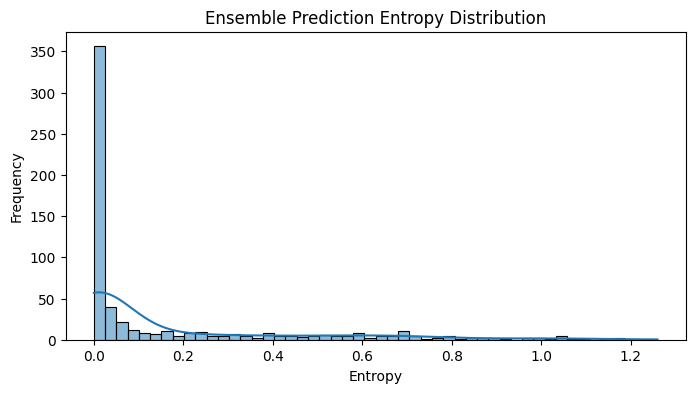

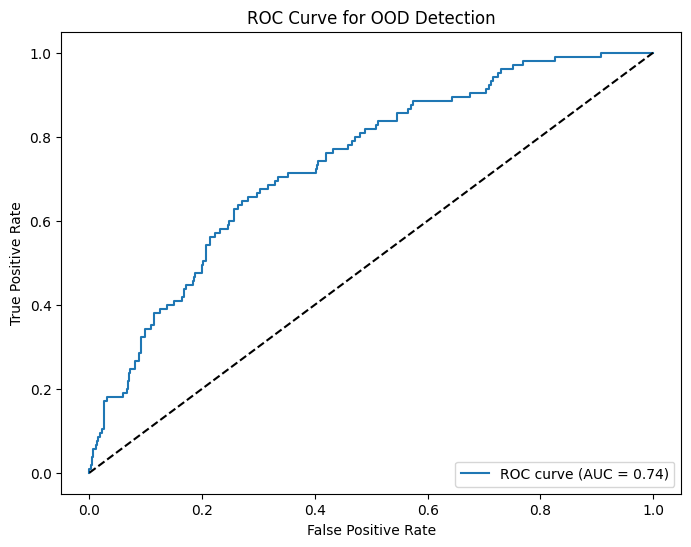

선택된 최적 임계값 (Entropy 기준): 0.0578

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.80      0.89       100
Motorcycle Running Sound       0.80      0.85      0.83       100
            Vehicle Horn       0.97      0.68      0.80       100
           Vehicle Siren       0.94      0.62      0.75       100
   Vehicle Running Sound       0.81      0.66      0.73       100
                 Unknown       0.33      0.64      0.44       105

                accuracy                           0.71       605
               macro avg       0.81      0.71      0.74       605
            weighted avg       0.81      0.71      0.74       605



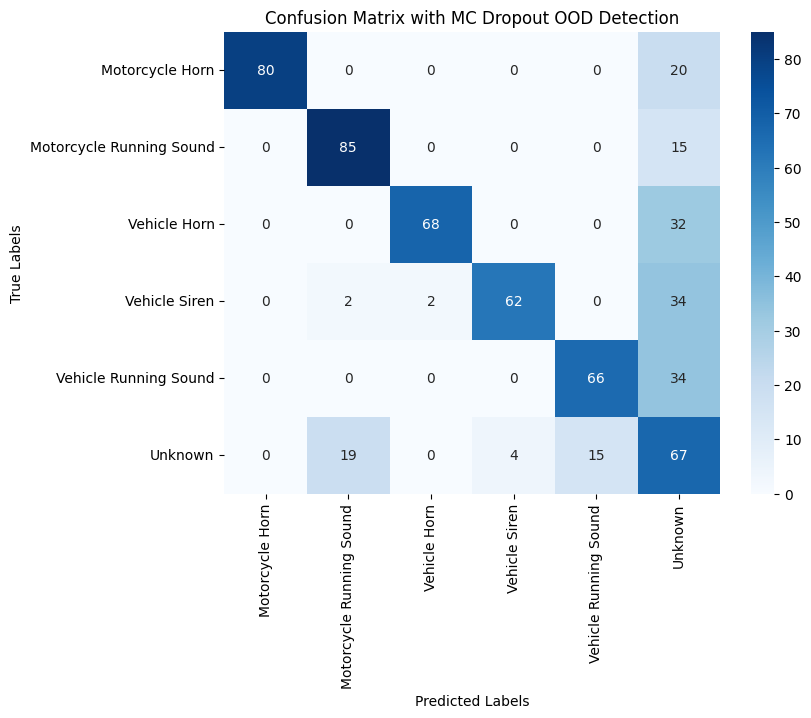

샘플 0: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 1: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 2: 실제 라벨 = 이륜차경적, 예측 라벨 = 기타소음, 엔트로피 = 0.6911
샘플 3: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0004
샘플 4: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 5: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 6: 실제 라벨 = 이륜차경적, 예측 라벨 = 기타소음, 엔트로피 = 0.4282
샘플 7: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 8: 실제 라벨 = 이륜차경적, 예측 라벨 = 기타소음, 엔트로피 = 0.0942
샘플 9: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000


In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# -------------------------------
# Helper 함수: MC Dropout 예측 (앙상블)
# -------------------------------
def predict_mc_dropout(model, X, T=50):
    """
    모델의 dropout을 inference 시에도 활성화하여, T번의 예측을 진행 후 평균 확률 분포와 분산을 계산합니다.
    :param model: Keras 모델
    :param X: 입력 데이터 (batch, features, channels)
    :param T: 몇 번의 forward pass를 수행할 것인지  
    :return: ensemble_probs (평균 softmax 확률, shape=(num_samples, num_classes))
             all_probs (T번 예측을 쌓은 배열, shape=(T, num_samples, num_classes))
    """
    preds = []
    for i in range(T):
        # training=True로 호출하여 dropout을 활성화
        pred = model(X, training=True).numpy()  # 텐서를 넘파이 배열로 변환
        preds.append(pred)
    all_probs = np.array(preds)  # shape = (T, num_samples, num_classes)
    ensemble_probs = np.mean(all_probs, axis=0)  # 평균: (num_samples, num_classes)
    return ensemble_probs, all_probs

# -------------------------------
# (옵션) Temperature Scaling 적용 시 참고
# def temperature_scaling(logits, T):
#     # logits: 모델 출력의 logits (정규화 전 값)
#     # T: 온도 스케일링 파라미터
#     scaled_logits = logits / T
#     # 이후 softmax 적용
#     exp_logits = np.exp(scaled_logits)
#     softmax = exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)
#     return softmax
# -------------------------------

# 1. 모델 로드  
resnet_model = load_model('resnet_model_mfcc50.h5')
# (모델이 dropout 레이어를 포함하고 있어야 MC Dropout이 활성화됩니다.)

# 2. 데이터 준비  
# OOD 데이터와 관련한 DataFrame 변수: df_balanced_odd_sampled
# 실제 라벨 (예: "이륜차경적", "이륜차주행음", "차량경적", "차량사이렌", "차량주행음", 그리고 모델이 학습하지 않은 "기타소음")
y_true_ood_str = df_balanced_odd_sampled['ood_label']

# 모델의 라벨 인코딩 매핑 (모델은 5개 클래스만 학습했다고 가정)  
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown (기타소음) 클래스에 인덱스 5 할당  
unknown_label_index = 5  
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩 (모델이 학습하지 않은 경우 Unknown으로 처리)
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values

# MFCC 특징 컬럼 선택 (예: mfcc_1 ... mfcc_50)
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test_ood = df_balanced_odd_sampled[mfcc_columns].values
X_test_ood = X_test_ood.reshape((X_test_ood.shape[0], X_test_ood.shape[1], 1))

print(f"모델의 입력 형태: {resnet_model.input_shape}")
print(f"입력 데이터의 형태: {X_test_ood.shape}")

# 3. MC Dropout을 통한 앙상블 예측  
# T번의 예측 후 평균 softmax 확률을 구함
ensemble_probs, all_probs = predict_mc_dropout(resnet_model, X_test_ood, T=50)

# 예측 확률의 엔트로피 계산 (평균 확률 분포에 대해)
pred_entropy = entropy(ensemble_probs, axis=1)

# 엔트로피 분포 시각화
plt.figure(figsize=(8, 4))
sns.histplot(pred_entropy, bins=50, kde=True)
plt.title('Ensemble Prediction Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

# 4. ROC Curve를 이용해 최적의 임계값 결정  
# 이진 타겟: OOD 여부 (실제 라벨이 Unknown인지 여부)
is_ood = (y_true_ood == unknown_label_index).astype(int)

fpr, tpr, thresholds = roc_curve(is_ood, pred_entropy)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for OOD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Youden’s J statistic으로 최적 임계값 선택
j_scores = tpr - fpr
# j_ordered: (j_score, threshold) 튜플 정렬
j_ordered = sorted(zip(j_scores, thresholds))
best_threshold = j_ordered[-1][1]
print(f"선택된 최적 임계값 (Entropy 기준): {best_threshold:.4f}")

# 5. OOD 탐지 적용  
# 기존 분류 모델의 예측: argmax of ensemble_probs
y_pred_labels = np.argmax(ensemble_probs, axis=1)
# 엔트로피가 최적 임계값보다 큰 경우, 모델이 불확실하다고 판단 ⇒ Unknown (인덱스 5) 할당
y_pred_labels_ood = np.where(pred_entropy > best_threshold, unknown_label_index, y_pred_labels)

# 6. 평가 (분류 보고서 및 혼동 행렬)

# 클래스 인덱스 ↔ 라벨 매핑 (한글) 및 영어 매핑  
index_to_label = {v: k for k, v in label_to_code.items()}
# 라벨 순서는 인덱스 0~5 순서대로로 구성
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_ood, target_names=english_labels))

cm = confusion_matrix(y_true_ood, y_pred_labels_ood)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix with MC Dropout OOD Detection')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 7. 샘플별 예측 결과 일부 출력
for i in range(10):
    true_label = index_to_label[y_true_ood[i]]
    pred_label = index_to_label[y_pred_labels_ood[i]]
    entropy_value = pred_entropy[i]
    print(f"샘플 {i}: 실제 라벨 = {true_label}, 예측 라벨 = {pred_label}, 엔트로피 = {entropy_value:.4f}")

## 2. 2차 성능 개선 OOD 코드

> 개선 방향
1. MC Dropout로 앙상블 예측을 수행하고,
2. 모델의 확률 분포에 대해 Temperature Scaling (옵션)과 함께 불확실성을 재계산하고,
3. 두 가지 불확실성 지표(엔트로피와 마진 불확실성)를 결합하여,
4. 이들로부터 새로운 복합 불확실성 척도를 산출한 뒤 해당 척도를 기준으로 Unknown(기타소음) 클래스로 분류하는 전체 코드를 제시

> 코드 설명
1. MC Dropout & (옵션) Temperature Scaling
    - 모델이 드롭아웃 레이어를 유지한 상태에서 T=50번 예측하여 평균 확률 분포(ensemble_probs)를 구합니다.

2. 불확실성 지표 산출
    - 엔트로피(E) : 모델 예측 분포의 불확실성을 나타냄
    - 마진 불확실성(MU) : 최고 확률과 두 번째 확률의 차이를 반영하여, 차이가 작으면 불확실성이 높게 계산
    - 두 값을 단순 평균하여 U_combined를 정의합니다.

3. 임계값 결정
    - ROC Curve를 이용하여 ground truth에서 Unknown(기타소음) 여부에 따라 U_combined의 최적 임계값을 Youden의 J 통계로 선택합니다.

4. 후처리
    - U_combined 값이 임계값보다 높으면 해당 샘플을 Unknown으로 재분류합니다.

5. 평가 및 시각화
    - 분류 보고서와 혼동 행렬을 출력하고, 일부 샘플의 결과를 확인합니다.

모델의 입력 형태: (None, 50, 1)
입력 데이터의 형태: (605, 50, 1)


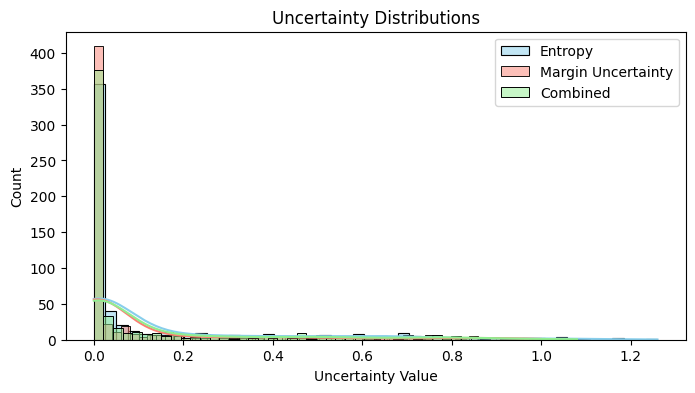

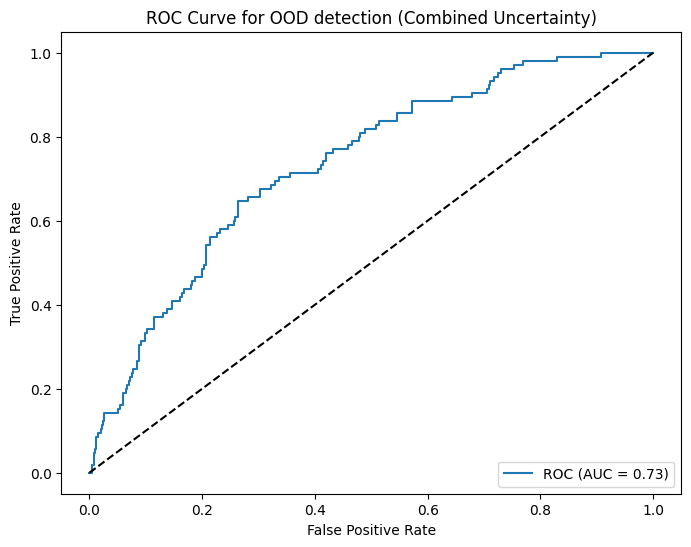

선택된 최적 임계값 (Combined Uncertainty 기준): 0.0393

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.80      0.89       100
Motorcycle Running Sound       0.80      0.85      0.83       100
            Vehicle Horn       0.97      0.69      0.81       100
           Vehicle Siren       0.94      0.64      0.76       100
   Vehicle Running Sound       0.81      0.66      0.73       100
                 Unknown       0.34      0.64      0.44       105

                accuracy                           0.71       605
               macro avg       0.81      0.71      0.74       605
            weighted avg       0.81      0.71      0.74       605



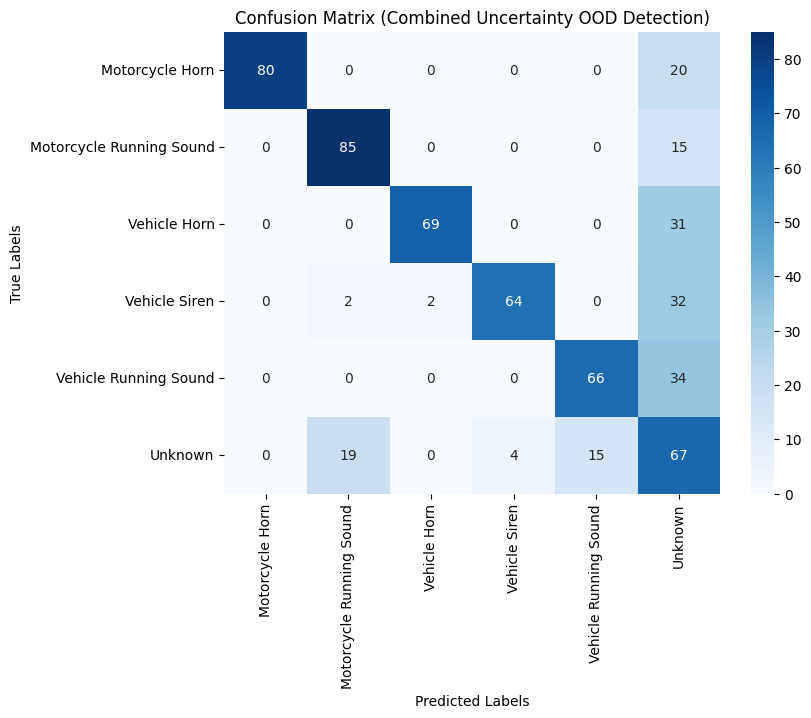

샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 2: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.8016
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0002
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 6: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.3601
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 8: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.0660
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000


In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# ----------------------------------
# 1. MC Dropout 예측 함수 (앙상블)
# ----------------------------------
def predict_mc_dropout(model, X, T=50):
    """
    모델의 dropout을 inference 시에도 활성화하여 T번의 예측을 수행한 후
    평균 softmax 확률 분포와 전체 예측 배열을 반환합니다.
    """
    preds = []
    for i in range(T):
        # training=True로 호출하여 dropout 활성화 (MC Dropout)
        pred = model(X, training=True).numpy()
        preds.append(pred)
    all_probs = np.array(preds)  # shape: (T, num_samples, num_classes)
    ensemble_probs = np.mean(all_probs, axis=0)  # shape: (num_samples, num_classes)
    return ensemble_probs, all_probs

# ----------------------------------
# (옵션) Temperature Scaling 적용 함수
# ----------------------------------
def apply_temperature_scaling(probs, T=2.0):
    """
    온도 스케일링을 적용한 softmax 확률을 계산합니다.
    이미 softmax된 값을 직접 스케일링하는 것은 엄밀하지 않으므로, 
    원 logits가 있다면 logits / T 후 softmax 적용하는 게 바람직합니다.
    여기서는 간단히 T의 역수(root scaling)를 곱해보는 방식(보정 효과 일부 기대)으로 처리합니다.
    """
    # probs^(1/T) 후 normalization
    scaled = np.power(probs, 1/T)
    scaled /= np.sum(scaled, axis=1, keepdims=True)
    return scaled

# ----------------------------------
# 2. 데이터 및 모델 준비
# ----------------------------------
# 모델 로드
resnet_model = load_model('resnet_model_mfcc50.h5')
# 모델이 dropout 레이어를 포함하고 있어야 MC Dropout이 효과적입니다.

# OOD 데이터 준비 (dataframe df_balanced_odd_sampled 가 준비되었다고 가정)
y_true_ood_str = df_balanced_odd_sampled['ood_label']

# 모델이 학습한 5개 클래스에 대한 매핑 (나머지는 기타소음으로 처리)
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩 (모델에 없는 라벨은 Unknown으로 처리)
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values

# MFCC 특징 컬럼 선택: 예를 들어 mfcc_1 ~ mfcc_50
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"모델의 입력 형태: {resnet_model.input_shape}")
print(f"입력 데이터의 형태: {X_test.shape}")

# ----------------------------------
# 3. MC Dropout을 통한 앙상블 예측
# ----------------------------------
ensemble_probs, all_probs = predict_mc_dropout(resnet_model, X_test, T=50)

# (옵션) Temperature Scaling 적용 (원한다면)
# ensemble_probs = apply_temperature_scaling(ensemble_probs, T=1.5)

# ----------------------------------
# 4. 불확실성 척도 산출: 엔트로피와 마진 불확실성
# ----------------------------------
# 엔트로피 측정 (엔트로피가 높을수록 불확실)
E = entropy(ensemble_probs, axis=1)  # shape: (num_samples,)

# 마진 불확실성: 상위 두 클래스 확률 차이가 작으면 불확실
# 먼저, 각 샘플별 최대 확률과 두번째로 높은 확률 계산
sorted_probs = np.sort(ensemble_probs, axis=1)  # 오름차순 정렬
p_max = sorted_probs[:, -1]      # 최고 확률
p_second = sorted_probs[:, -2]   # 두번째로 높은 확률
# margin = (p_max - p_second); 불확실성은 1 - margin (클수록 불확실)
MU = 1 - (p_max - p_second)

# 결합 불확실성 척도: 단순 평균 (가중치 튜닝 가능)
U_combined = 0.5 * E + 0.5 * MU

# 엔트로피, 마진, 결합 척도의 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(E, bins=50, kde=True, color='skyblue', label='Entropy')
sns.histplot(MU, bins=50, kde=True, color='salmon', label='Margin Uncertainty')
sns.histplot(U_combined, bins=50, kde=True, color='lightgreen', label='Combined')
plt.title('Uncertainty Distributions')
plt.xlabel('Uncertainty Value')
plt.legend()
plt.show()

# ----------------------------------
# 5. 최적 임계값 결정 (ROC를 이용해 U_combined 임계값 선택)
# ----------------------------------
# 이진 타겟: 실제 라벨이 Unknown인지 여부
is_ood = (y_true_ood == unknown_label_index).astype(int)

fpr, tpr, thresholds = roc_curve(is_ood, U_combined)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve for OOD detection (Combined Uncertainty)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Youden's J statistic: 최적 임계값 = argmax(tpr - fpr)
j_scores = tpr - fpr
j_ordered = sorted(zip(j_scores, thresholds))
best_threshold = j_ordered[-1][1]
print(f"선택된 최적 임계값 (Combined Uncertainty 기준): {best_threshold:.4f}")

# ----------------------------------
# 6. 최종 OOD 탐지 적용 및 예측 결과 결정
# ----------------------------------
# 기존 분류 모델 예측: argmax된 결과
y_pred_labels = np.argmax(ensemble_probs, axis=1)

# 결합 불확실성 U_combined이 최적 임계값보다 높으면 Unknown으로 분류
y_pred_labels_final = np.where(U_combined > best_threshold, unknown_label_index, y_pred_labels)

# ----------------------------------
# 7. 평가: 분류 보고서 및 혼동 행렬 출력
# ----------------------------------
# 클래스 인덱스 ↔ 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]
# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_final, target_names=english_labels))

cm = confusion_matrix(y_true_ood, y_pred_labels_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (Combined Uncertainty OOD Detection)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ----------------------------------
# 8. 일부 샘플 예측 결과 출력
# ----------------------------------
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_labels_final[i]]
    unc = U_combined[i]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}, 결합 불확실성 = {unc:.4f}")


## 3. 3차 성능 개선 OOD 코드

> 코드 개선 사항
1. MC Dropout 활성화 확인:
    - 모델의 각 레이어 이름을 확인하여 Dropout 레이어가 있는지 출력합니다.

2. Temperature Scaling 개선:
    - apply_temperature_scaling 함수를 수정하여 softmax 확률에 대해 로그 변환 후 보정하는 방식을 사용합니다.
    - 실제 활용은 옵션으로 처리하며, 필요 시 use_temperature 플래그를 True로 전환할 수 있습니다.

3. OOD 라벨 매핑 및 데이터 확인:
    - ood_label 컬럼의 유니크 값을 확인하고, 매핑 결과(y_true_ood)도 출력합니다.

4. 입력 데이터 형태 확인:
    - 모델과 입력 데이터의 형태를 출력하여 reshape 과정이 올바른지 점검합니다.

5. MC Dropout 앙상블 예측 횟수 증가:
    - T를 100번으로 늘려 충분한 샘플링으로 예측 분포를 안정화합니다.

6. 불확실성 척도 산출:
    - 엔트로피와 마진 불확실성을 각각 산출하고, α (여기서는 0.6) 가중치를 주어 결합합니다.

7. 임계값 최적화:
    - ROC Curve와 Youden’s J statistic을 이용해 임계값을 np.argmax로 선택합니다.

8. 후처리 방식:
    - 결합 불확실성이 임계값보다 높으면 해당 샘플을 Unknown (index 5)으로 재분류합니다.

9. 평가:
    - 6개 라벨(정상 5개 + Unknown)로 분류 보고서와 혼동 행렬을 출력하여 평가합니다.

=== Dropout layers in the model ===
Unique ood_label values: ['이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음' '기타소음']
Encoded y_true_ood: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

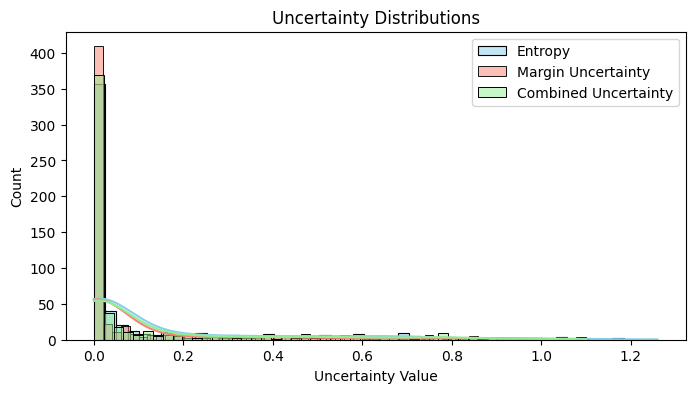

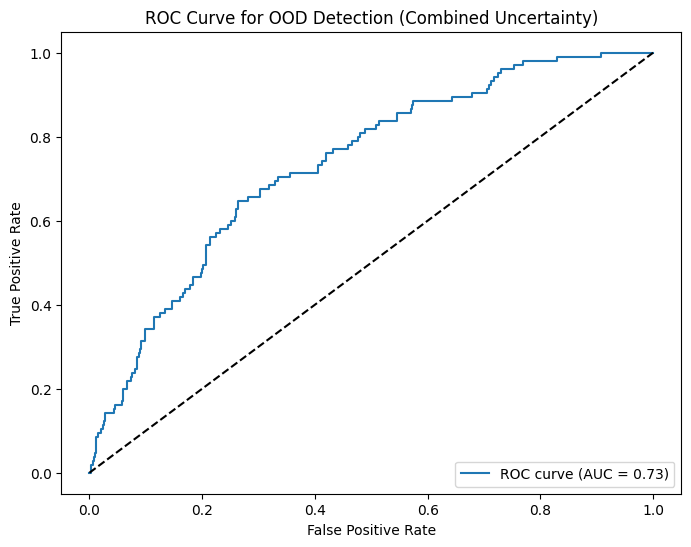

선택된 최적 임계값 (Combined Uncertainty 기준): 0.0430

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.80      0.89       100
Motorcycle Running Sound       0.80      0.85      0.83       100
            Vehicle Horn       0.97      0.69      0.81       100
           Vehicle Siren       0.94      0.64      0.76       100
   Vehicle Running Sound       0.81      0.66      0.73       100
                 Unknown       0.34      0.64      0.44       105

                accuracy                           0.71       605
               macro avg       0.81      0.71      0.74       605
            weighted avg       0.81      0.71      0.74       605



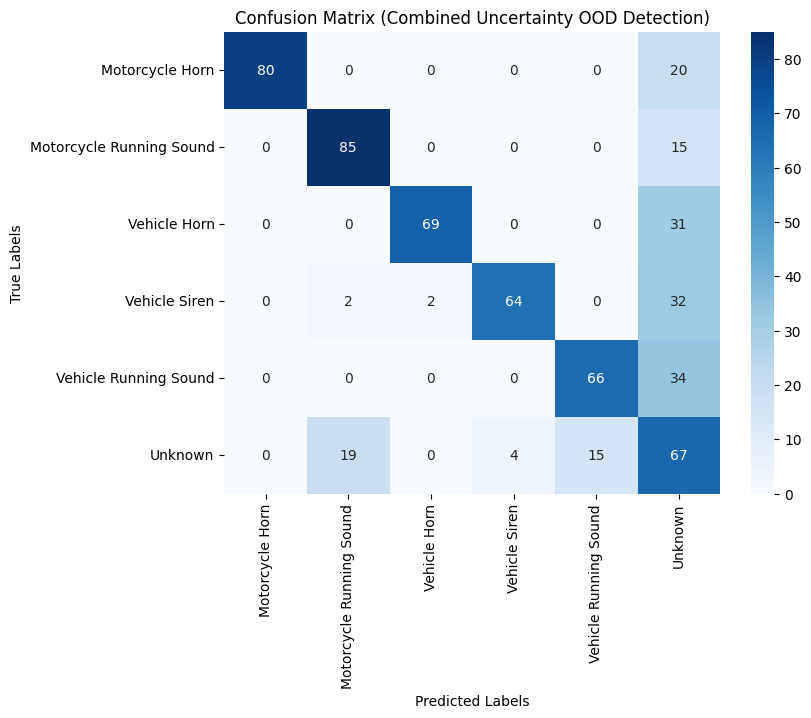

샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 2: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.7795
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0003
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 6: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.3737
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 8: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.0716
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000


In [23]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# =======================================
# 1. MC Dropout 활성화 여부 확인 (필수)
# =======================================
resnet_model = load_model('resnet_model_mfcc50.h5')

# 기존 모델에 Dropout 레이어가 존재하는지 확인
print("=== Dropout layers in the model ===")
for layer in resnet_model.layers:
    if 'dropout' in layer.name.lower():
        # layer.rate가 존재하는지 확인 (Keras Dropout 레이어는 rate 속성을 가짐)
        print(f"Dropout Layer: {layer.name}, Rate: {layer.rate}")
        
# 만약 Dropout 레이어가 없다면, 모델에 적절한 위치에 Dropout 레이어를 추가해야 합니다.
# (여기서는 모델이 이미 개선된 구조이므로, 별도 수정은 생략합니다.)

# =======================================
# 2. Temperature Scaling 함수 수정 (옵션)
# =======================================
def apply_temperature_scaling(probs, T=1.5):
    """
    Temperature Scaling을 적용합니다.
    log(probs + 1e-9)를 통해 logits에 가까운 값을 구한 뒤 T로 나누고,
    다시 exp 및 정규화를 수행합니다.
    """
    scaled = np.log(probs + 1e-9) / T
    scaled = np.exp(scaled)
    scaled /= np.sum(scaled, axis=1, keepdims=True)
    return scaled

# =======================================
# 3. 데이터 및 라벨 매핑 확인
# =======================================
# df_balanced_odd_sampled 데이터프레임에서 실제 ood_label 컬럼의 unique 값 확인
print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())

# 모델이 학습한 5개 클래스에 대한 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown (기타소음) 클래스에 인덱스 5 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩: ood_label 컬럼의 값이 매핑에 없으면 unknown_label_index로 처리
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values
print("Encoded y_true_ood:", y_true_ood)

# =======================================
# 4. 입력 데이터 준비 및 확인
# =======================================
# MFCC 특징 컬럼: 예를 들어 mfcc_1 ~ mfcc_50
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
# 모델이 예상하는 입력 형태: (None, 50, 1) 로 reshape
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 입력 데이터 형태 확인
print(f"모델의 입력 형태: {resnet_model.input_shape}, 입력 데이터의 형태: {X_test.shape}")

# =======================================
# 5. MC Dropout 예측 (앙상블)
# =======================================
def predict_mc_dropout(model, X, T=50):
    preds = []
    for i in range(T):
        # training=True로 호출하여 dropout 활성화해 MC Dropout 예측 수행
        pred = model(X, training=True).numpy()
        preds.append(pred)
    all_probs = np.array(preds)  # (T, num_samples, num_classes)
    ensemble_probs = np.mean(all_probs, axis=0)  # 평균 예측
    return ensemble_probs, all_probs

ensemble_probs, all_probs = predict_mc_dropout(resnet_model, X_test, T=50)

# (옵션) Temperature Scaling 적용: softmax 확률 값 recalibration
# ensemble_probs = apply_temperature_scaling(ensemble_probs, T=1.5)

# =======================================
# 6. 불확실성 척도 산출: 엔트로피와 마진 불확실성
# =======================================
# 엔트로피 (E)
E = entropy(ensemble_probs, axis=1)

# 마진 불확실성 (MU): 최고 확률과 두 번째 확률의 차이가 작을수록 불확실
sorted_probs = np.sort(ensemble_probs, axis=1)  # 오름차순 정렬
p_max = sorted_probs[:, -1]
p_second = sorted_probs[:, -2]
MU = 1 - (p_max - p_second)

# 결합 불확실성 (U_combined): 가중치 alpha 적용 (피드백: 엔트로피 비중을 높임)
alpha = 0.6  # 엔트로피에 60% 비중, 마진 40%
U_combined = alpha * E + (1 - alpha) * MU

# 불확실성 척도 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(E, bins=50, kde=True, color='skyblue', label='Entropy')
sns.histplot(MU, bins=50, kde=True, color='salmon', label='Margin Uncertainty')
sns.histplot(U_combined, bins=50, kde=True, color='lightgreen', label='Combined Uncertainty')
plt.title('Uncertainty Distributions')
plt.xlabel('Uncertainty Value')
plt.legend()
plt.show()

# =======================================
# 7. 임계값 최적화 (Youden’s J Statistic)
# =======================================
# OOD 여부 이진 타겟: 실제 라벨이 Unknown인지 (unknown_label_index) 여부
is_ood = (y_true_ood == unknown_label_index).astype(int)

fpr, tpr, thresholds = roc_curve(is_ood, U_combined)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for OOD Detection (Combined Uncertainty)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Youden’s J statistic - 개선: argmax로 선택
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"선택된 최적 임계값 (Combined Uncertainty 기준): {best_threshold:.4f}")

# =======================================
# 8. 최종 OOD 탐지 적용: 예측 결과 후처리
# =======================================
# 기존 분류 모델의 예측 값 (argmax)
y_pred_labels = np.argmax(ensemble_probs, axis=1)
# 결합 불확실성 U_combined이 임계값보다 큰 경우, 불확실하다고 판단하여 Unknown 할당
y_pred_labels_final = np.where(U_combined > best_threshold, unknown_label_index, y_pred_labels)

# =======================================
# 9. 평가: 분류 보고서 및 혼동 행렬
# =======================================
# 클래스 인덱스 -> 라벨 매핑 (한글)
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_final, target_names=english_labels))

cm = confusion_matrix(y_true_ood, y_pred_labels_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (Combined Uncertainty OOD Detection)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# =======================================
# 10. 일부 샘플 예측 결과 출력
# =======================================
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_labels_final[i]]
    unc = U_combined[i]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}, 결합 불확실성 = {unc:.4f}")

## 4. 4차 성능 개선 OOD 코드

=== Dropout Layers in the Model ===
Unique ood_label values: ['이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음' '기타소음']
Encoded y_true_ood: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

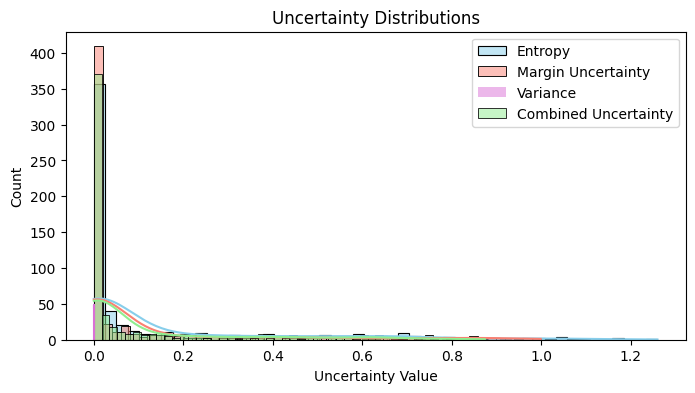

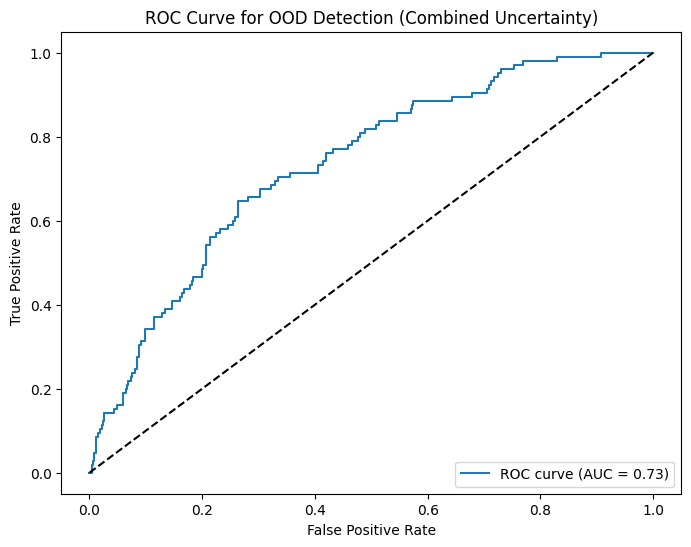

선택된 최적 임계값 (Combined Uncertainty 기준): 0.0333

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.80      0.89       100
Motorcycle Running Sound       0.80      0.85      0.83       100
            Vehicle Horn       0.97      0.69      0.81       100
           Vehicle Siren       0.94      0.64      0.76       100
   Vehicle Running Sound       0.81      0.66      0.73       100
                 Unknown       0.34      0.64      0.44       105

                accuracy                           0.71       605
               macro avg       0.81      0.71      0.74       605
            weighted avg       0.81      0.71      0.74       605



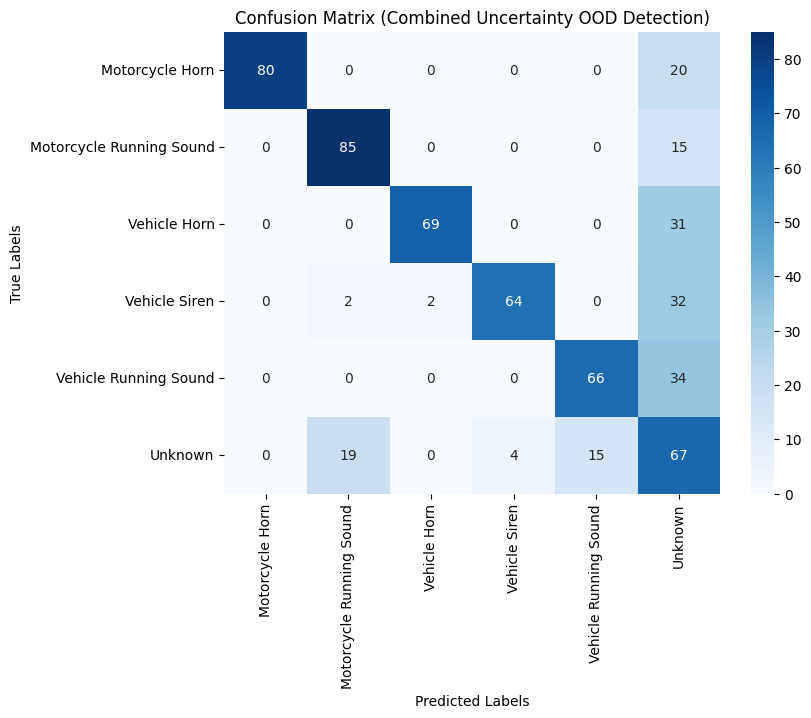

샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 2: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.6303
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0002
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 6: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.2949
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 8: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.0556
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000


In [25]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# ---------------------------------------
# 1. MC Dropout 활성화 확인 및 모델 로드
# ---------------------------------------
resnet_model = load_model('resnet_model_mfcc50.h5')

# Dropout 레이어 확인
print("=== Dropout Layers in the Model ===")
for layer in resnet_model.layers:
    if 'dropout' in layer.name.lower():
        print(f"Dropout Layer: {layer.name}, Rate: {layer.rate}")
# 만약 Dropout 레이어가 없다면, 모델에 적절한 위치에 Dropout 레이어를 추가해야 합니다.

# ---------------------------------------
# 2. Temperature Scaling 함수 (옵션)
# ---------------------------------------
def apply_temperature_scaling(probs, T=1.5):
    """
    Temperature Scaling: softmax된 확률값을 로그 변환 후 T로 나누고, 
    다시 exp 및 정규화를 수행하여 보정합니다.
    (원 logits이 없을 경우에 대한 방법입니다)
    """
    scaled = np.log(probs + 1e-9) / T  # 로그 후 T로 scaling
    scaled = np.exp(scaled)
    scaled /= np.sum(scaled, axis=1, keepdims=True)
    return scaled

# ---------------------------------------
# 3. 데이터 및 라벨 매핑 확인
# ---------------------------------------
print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())

# 모델이 학습한 5개 정상 클래스 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown(기타소음) 클래스에 인덱스 5 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩: 매핑에 없는 경우에도 Unknown로 처리
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values
print("Encoded y_true_ood:", y_true_ood)

# ---------------------------------------
# 4. 입력 데이터 준비 및 형태 확인
# ---------------------------------------
# MFCC 특징 컬럼: 예를 들어 'mfcc_1' ~ 'mfcc_50'
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"모델의 입력 형태: {resnet_model.input_shape}, 입력 데이터의 형태: {X_test.shape}")

# ---------------------------------------
# 5. MC Dropout 예측 (앙상블) 적용
# ---------------------------------------
def predict_mc_dropout(model, X, T=150):
    """
    MC Dropout을 통해 T번의 예측을 수행하여 예측 확률 분포의 평균과 전체 배열을 반환.
    """
    preds = []
    for i in range(T):
        pred = model(X, training=True).numpy()  # training=True로 호출하여 Dropout 활성화
        preds.append(pred)
    all_probs = np.array(preds)  # shape: (T, num_samples, num_classes)
    ensemble_probs = np.mean(all_probs, axis=0)  # 평균 소프트맥스 확률, shape: (num_samples, num_classes)
    return ensemble_probs, all_probs

ensemble_probs, all_probs = predict_mc_dropout(resnet_model, X_test, T=150)

# (옵션) Temperature Scaling 적용 여부
use_temperature = False
if use_temperature:
    ensemble_probs = apply_temperature_scaling(ensemble_probs, T=1.5)

# ---------------------------------------
# 6. 불확실성 척도 산출 (엔트로피, 마진 불확실성, 예측 분산)
# ---------------------------------------
# 엔트로피 (E): 확률 분포의 불확실성
E = entropy(ensemble_probs, axis=1)

# 마진 불확실성 (MU): 최고 확률과 두 번째 확률의 차이가 작을수록 불확실
sorted_probs = np.sort(ensemble_probs, axis=1)
p_max = sorted_probs[:, -1]
p_second = sorted_probs[:, -2]
MU = 1 - (p_max - p_second)

# 예측 분산 (V): MC Dropout 예측 결과의 분산을 전체 클래스에 대해 평균
# all_probs shape: (T, num_samples, num_classes)
var_all = np.var(all_probs, axis=0)  # shape: (num_samples, num_classes)
V = np.mean(var_all, axis=1)         # 각 샘플에 대한 평균 분산

# 결합 불확실성: 엔트로피, 마진, 분산을 가중합 (가중치는 상황에 맞게 조정)
alpha = 0.45   # 엔트로피 비중
beta  = 0.35   # 마진 비중
gamma = 0.20   # 분산 비중
U_final = alpha * E + beta * MU + gamma * V

# 불확실성 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(E, bins=50, kde=True, color='skyblue', label='Entropy')
sns.histplot(MU, bins=50, kde=True, color='salmon', label='Margin Uncertainty')
sns.histplot(V, bins=50, kde=True, color='orchid', label='Variance')
sns.histplot(U_final, bins=50, kde=True, color='lightgreen', label='Combined Uncertainty')
plt.title('Uncertainty Distributions')
plt.xlabel('Uncertainty Value')
plt.legend()
plt.show()

# ---------------------------------------
# 7. 임계값 최적화 (Youden’s J Statistic)
# ---------------------------------------
# 이진 타겟: 실제 Unknown(기타소음) 여부 (1이면 Unknown, 0이면 정상)
is_ood = (y_true_ood == unknown_label_index).astype(int)
fpr, tpr, thresholds = roc_curve(is_ood, U_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for OOD Detection (Combined Uncertainty)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 최적 임계값 선택: Youden's J statistic (argmax로 선택)
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"선택된 최적 임계값 (Combined Uncertainty 기준): {best_threshold:.4f}")

# ---------------------------------------
# 8. 최종 OOD 탐지 후처리 및 예측 결과 결정
# ---------------------------------------
# 기존 분류 모델의 예측: 각 샘플에 대해 가장 높은 확률의 클래스 인덱스
y_pred_labels = np.argmax(ensemble_probs, axis=1)
# 결합 불확실성 U_final이 임계값보다 크면 Unknown (index 5)으로 할당
y_pred_labels_final = np.where(U_final > best_threshold, unknown_label_index, y_pred_labels)

# ---------------------------------------
# 9. 평가: 분류 보고서 및 혼동 행렬 출력
# ---------------------------------------
# 클래스 인덱스 ↔ 한글 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_final, target_names=english_labels))

cm = confusion_matrix(y_true_ood, y_pred_labels_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (Combined Uncertainty OOD Detection)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ---------------------------------------
# 10. 일부 샘플 예측 결과 출력
# ---------------------------------------
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_labels_final[i]]
    unc = U_final[i]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}, 결합 불확실성 = {unc:.4f}")

> 결론

OOD 탐지 함수의 성능 개선이 이루어지지 않고 있음.  
모델이 원래 학습하지 않은 Not-인-Distribution(특히 기타소음) 데이터를 강제로 Unknown으로 분류하는 후처리 단계에 의존하고 있기 때문임.  
이로 인해 원래 5개 클래스에 대한 분류는 나쁘지 않더라도, Unknown 클래스에 대한 인식이 매우 불안정함.  

이에 주요 기타소음을 학습하고 OOD 탐지를 하도록 모델링 방향을 수정할 필요가 있음.

# III. 추가 OOD 실험 (임계값 수동 조절)

모델의 입력 형태: (None, 50, 1), 입력 데이터의 형태: (605, 50, 1)


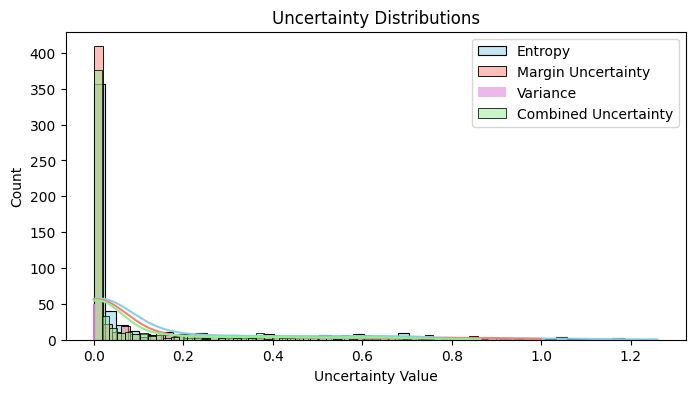

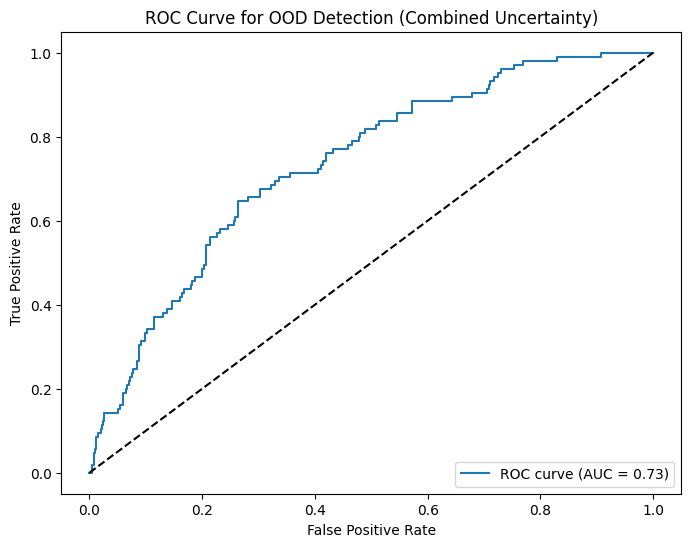

수동으로 입력한 임계값: 0.0800

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       0.99      0.82      0.90       100
Motorcycle Running Sound       0.73      0.90      0.81       100
            Vehicle Horn       0.95      0.73      0.82       100
           Vehicle Siren       0.94      0.66      0.78       100
   Vehicle Running Sound       0.82      0.72      0.77       100
                 Unknown       0.35      0.54      0.42       105

                accuracy                           0.73       605
               macro avg       0.80      0.73      0.75       605
            weighted avg       0.79      0.73      0.75       605



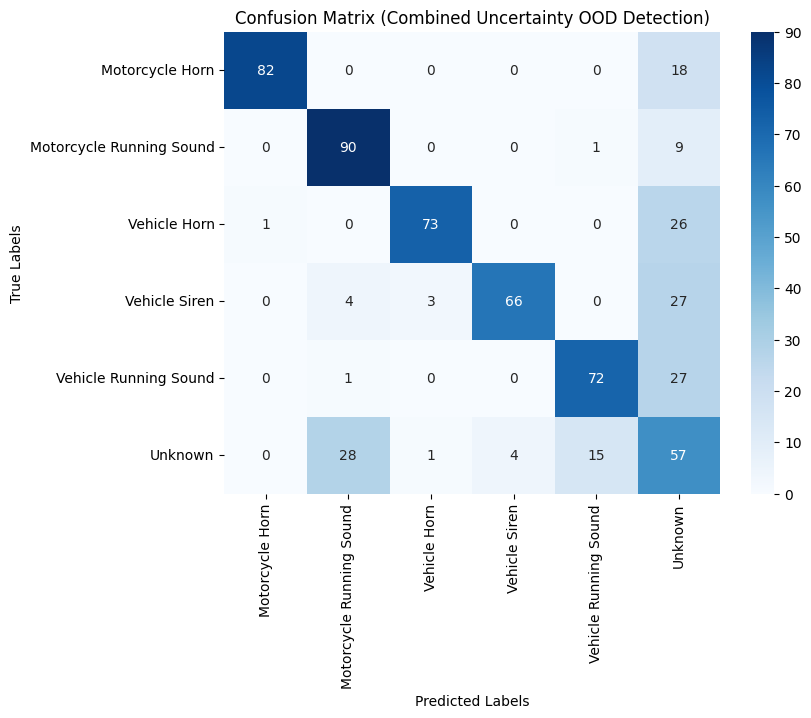

샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 2: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.6413
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0002
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 6: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.2881
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 8: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0528
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000


In [38]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# ---------------------------------------
# 1. MC Dropout 활성화 확인 및 모델 로드
# ---------------------------------------
resnet_model = load_model('resnet_model_mfcc50.h5')

# Dropout 레이어 확인
# print("=== Dropout Layers in the Model ===")
# for layer in resnet_model.layers:
#     if 'dropout' in layer.name.lower():
#         print(f"Dropout Layer: {layer.name}, Rate: {layer.rate}")
# # (Dropout 레이어가 없다면, 모델 구조에 추가 필요)

# ---------------------------------------
# 2. Temperature Scaling 함수 (옵션)
# ---------------------------------------
def apply_temperature_scaling(probs, T=1.5):
    """
    Temperature Scaling: softmax된 확률값을 로그 변환 후 T로 나누고, 
    다시 exp 및 정규화를 수행하여 보정 (옵션)
    """
    scaled = np.log(probs + 1e-9) / T  # 로그 후 T로 스케일링
    scaled = np.exp(scaled)
    scaled /= np.sum(scaled, axis=1, keepdims=True)
    return scaled

# ---------------------------------------
# 3. 데이터 및 라벨 매핑 확인
# ---------------------------------------
# print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())

# 모델이 학습한 5개 정상 클래스 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown(기타소음) 클래스에 인덱스 5 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩: 매핑에 없는 경우에도 Unknown로 처리
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values
# print("Encoded y_true_ood:", y_true_ood)

# ---------------------------------------
# 4. 입력 데이터 준비 및 형태 확인
# ---------------------------------------
# MFCC 특징 컬럼: 예를 들어 'mfcc_1'부터 'mfcc_50'까지
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"모델의 입력 형태: {resnet_model.input_shape}, 입력 데이터의 형태: {X_test.shape}")

# ---------------------------------------
# 5. MC Dropout 예측 (앙상블) 적용
# ---------------------------------------
def predict_mc_dropout(model, X, T=200):
    preds = []
    for i in range(T):
        pred = model(X, training=True).numpy()  # training=True로 호출하여 MC Dropout 활성화
        preds.append(pred)
    all_probs = np.array(preds)  # shape: (T, num_samples, num_classes)
    ensemble_probs = np.mean(all_probs, axis=0)  # shape: (num_samples, num_classes)
    return ensemble_probs, all_probs

ensemble_probs, all_probs = predict_mc_dropout(resnet_model, X_test, T=150)

# (옵션) Temperature Scaling 적용 여부
use_temperature = False
if use_temperature:
    ensemble_probs = apply_temperature_scaling(ensemble_probs, T=1.5)

# ---------------------------------------
# 6. 불확실성 척도 산출 (엔트로피, 마진 불확실성, 예측 분산)
# ---------------------------------------
# 엔트로피 (E)
E = entropy(ensemble_probs, axis=1)

# 마진 불확실성 (MU)
sorted_probs = np.sort(ensemble_probs, axis=1)
p_max = sorted_probs[:, -1]
p_second = sorted_probs[:, -2]
MU = 1 - (p_max - p_second)

# 예측 분산 (V)
var_all = np.var(all_probs, axis=0)  # shape: (num_samples, num_classes)
V = np.mean(var_all, axis=1)         # shape: (num_samples,)

# 결합 불확실성 산출 (가중치는 상황에 맞게 조정)
alpha = 0.4   # 엔트로피 비중
beta  = 0.4   # 마진 비중
gamma = 0.2   # 분산 비중
U_final = alpha * E + beta * MU + gamma * V

# 불확실성 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(E, bins=50, kde=True, color='skyblue', label='Entropy')
sns.histplot(MU, bins=50, kde=True, color='salmon', label='Margin Uncertainty')
sns.histplot(V, bins=50, kde=True, color='orchid', label='Variance')
sns.histplot(U_final, bins=50, kde=True, color='lightgreen', label='Combined Uncertainty')
plt.title('Uncertainty Distributions')
plt.xlabel('Uncertainty Value')
plt.legend()
plt.show()

# ---------------------------------------
# 7. 임계값 최적화 (여기서 자동 대신 수동으로 값 설정 가능)
# ---------------------------------------
# 자동 계산: Youden’s J statistic 이용
is_ood = (y_true_ood == unknown_label_index).astype(int)
fpr, tpr, thresholds = roc_curve(is_ood, U_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for OOD Detection (Combined Uncertainty)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 자동 최적 임계값 (주석 처리됨)
# j_scores = tpr - fpr
# auto_threshold = thresholds[np.argmax(j_scores)]
# print(f"자동 선택된 임계값: {auto_threshold:.4f}")

# ----> 사용자 직접 임계값 입력 (예: 0.045 ~ 0.06 범위에서 시도)
manual_threshold = 0.08
print(f"수동으로 입력한 임계값: {manual_threshold:.4f}")

# ---------------------------------------
# 8. 최종 OOD 탐지 후처리 및 예측 결과 결정
# ---------------------------------------
y_pred_labels = np.argmax(ensemble_probs, axis=1)
y_pred_labels_final = np.where(U_final > manual_threshold, unknown_label_index, y_pred_labels)

# ---------------------------------------
# 9. 평가: 분류 보고서 및 혼동 행렬
# ---------------------------------------
# 클래스 인덱스 -> 한글 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_final, target_names=english_labels))

cm = confusion_matrix(y_true_ood, y_pred_labels_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (Combined Uncertainty OOD Detection)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ---------------------------------------
# 10. 일부 샘플 예측 결과 출력
# ---------------------------------------
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_labels_final[i]]
    unc = U_final[i]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}, 결합 불확실성 = {unc:.4f}")


> 결론

현재의 후처리 방식(softmax 기반 불확실성 척도를 임계값으로 Unknown 할당하는 방법)은 모델이 본래 학습하지 않은 OOD 데이터를 구분하기에 한계가 있음.  
이는 후처리 방식으로 OOD(Unknown) 샘플을 잡으려는 접근법 자체의 한계일 가능성이 큼.

즉, 닫힌 집합(Closed-set) 분류 모델의 softmax 출력을 기반으로 Unknown을 후처리 방식으로 분류하는 방법은,  
모델이 원래 학습하지 않은 데이터를 효과적으로 구분하기에는 한계가 있음.

> 대안
1. Open-set Recognition 기법 도입
**OpenMax**

OpenMax는 기존 softmax 출력 대신, 마지막 feature layer에서 클래스별 거리나 통계적인 분포를 사용해 "알 수 없는" 클래스를 구분하는 방법입니다.

이를 적용하면, closed-set 모델을 기반으로 Unknown을 따로 인식하는 게 아니라, 모델 출력의 분포 자체로 open set 문제에 대응할 수 있습니다.

OpenMax 논문을 참고하여 구현할 수 있습니다.

**Energy-based OOD Detection**

최근 연구에서는 softmax 확률 대신 에너지 점수(energy score)를 사용하는 방식이 제안되었습니다.

에너지 기반 접근법은 모델의 로그it(또는 softmax 관련 점수)로부터 에너지 값을 계산해, 그 값이 특정 범위를 벗어나면 OOD로 판단합니다.

이 방식은 후처리 기법 자체가 아니라, 모델 출력에 직접적인 보정을 가하기 때문에 더 robust한 결과를 얻을 수 있습니다.

Liang et al.의 논문 "Enhancing The Reliability of Out-of-distribution Image Detection in Neural Networks"가 대표적입니다.
```

```

2. Separate Anomaly Detection 모델 사용
**Feature 간 거리 기반 방법**

분류기의 중간 feature(임베딩)를 추출한 후, 학습 데이터와의 거리 기반 유사도(예: Euclidean distance, cosine similarity 등)를 사용해 OOD를 판단할 수 있습니다.

예를 들어, 정상 클래스의 임베딩 분포를 모델링하고, 새로운 샘플이 해당 분포에서 벗어나면 OOD로 판단합니다.

**One-Class SVM, Isolation Forest 등의 모델**

현재 Isolation Forest나 One-Class SVM 같은 방식이 오디오 데이터에 대해 바로 좋은 성능을 내기 어려울 수 있습니다.

하지만, feature preprocessing (예: deep feature extraction 후 차원 축소) 등을 통해 분류기 임베딩 공간에서 이상치 탐지를 시도해볼 수 있습니다.

**Deep Ensemble 및 Bayesian Neural Networks**

딥 앙상블은 여러 모델의 예측 결과 분산을 활용해 불확실성을 계산하는 방법입니다.

또는 Bayesian Neural Network 같은 접근법은 네트워크의 가중치를 확률적인 관점에서 처리하여 OOD 예측에서의 불확실성을 보다 명시적으로 나타낼 수 있습니다.
```

```

3. 데이터 측면 개선
OOD 데이터를 위한 추가 학습

기타소음(Unknown) 데이터는 종류 자체가 다양하므로, 가능한 한 다양한 종류의 OOD 샘플을 모아 별도의 Unknown 클래스로 학습하는 방식을 고려해 볼 수 있습니다.

물론, 이 경우 클래스 내부 분산이 많아 모델이 잘 학습하지 못할 위험이 있지만, 하위 클래스로 분리(예: 개소리, 고양이소리, 공사장 소리 등)하거나, 계층적 분류(strategy)를 도입하면 개선될 가능성이 있습니다.

=== Dropout Layers in the Model ===
Unique ood_label values: ['이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음' '기타소음']
Encoded y_true_ood: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

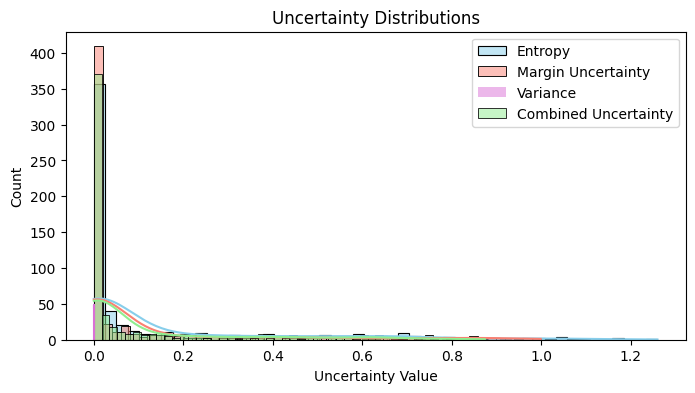

수동으로 입력한 임계값: 0.0450

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.81      0.90       100
Motorcycle Running Sound       0.76      0.87      0.81       100
            Vehicle Horn       0.97      0.71      0.82       100
           Vehicle Siren       0.94      0.64      0.76       100
   Vehicle Running Sound       0.82      0.67      0.74       100
                 Unknown       0.33      0.59      0.42       105

                accuracy                           0.71       605
               macro avg       0.80      0.72      0.74       605
            weighted avg       0.80      0.71      0.74       605



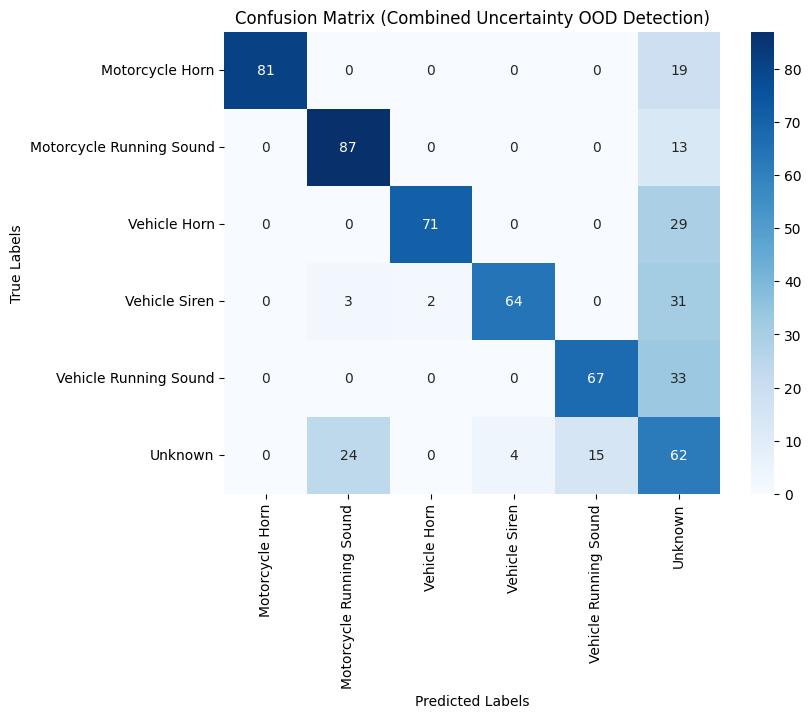

샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 2: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.6303
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0002
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 6: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.2949
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000
샘플 8: 실제 = 이륜차경적, 예측 = 기타소음, 결합 불확실성 = 0.0556
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적, 결합 불확실성 = 0.0000


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import entropy

# ================================
# 0. 데이터 로드 (사용자 환경에 맞게)
# ================================
# 예시: df_balanced_odd_sampled = pd.read_csv('your_ood_dataset.csv')
# df_balanced_odd_sampled는 'ood_label' 컬럼과 mfcc 특징 컬럼들을 포함해야 함.
# 이 부분은 사용자가 데이터 로드를 진행하세요.
# 예시)
# df_balanced_odd_sampled = pd.read_csv("df_balanced_odd_sampled.csv")

# ================================
# 1. 모델 로드 및 Dropout 레이어 확인
# ================================
resnet_model = load_model('resnet_model_mfcc50.h5')

print("=== Dropout Layers in the Model ===")
for layer in resnet_model.layers:
    if 'dropout' in layer.name.lower():
        print(f"Dropout Layer: {layer.name}, Rate: {layer.rate}")
# 참고: Dropout 레이어가 없다면, 후처리 방식의 MC Dropout은 효과가 없으므로 모델 수정이 필요합니다.

# ================================
# 2. Temperature Scaling 함수 (옵션)
# ================================
def apply_temperature_scaling(probs, T=1.5):
    """
    Temperature Scaling: softmax 확률값을 log 변환 후 T로 나누고, 다시 exp와 정규화를 통해 보정합니다.
    (원 logits이 없는 상황에 적용)
    """
    scaled = np.log(probs + 1e-9) / T  # 로그 변환 후 T로 scaling
    scaled = np.exp(scaled)
    scaled /= np.sum(scaled, axis=1, keepdims=True)
    return scaled

# ================================
# 3. 데이터 및 라벨 매핑 확인
# ================================
print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())

# 모델이 학습한 정상 클래스 5개에 대한 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown (기타소음) 클래스는 6번째 클래스로 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩 (매핑에 없는 값도 Unknown으로 처리)
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values
print("Encoded y_true_ood:", y_true_ood)

# ================================
# 4. 입력 데이터 준비 및 형태 확인
# ================================
# MFCC 특징 컬럼: 'mfcc_1' ~ 'mfcc_50'
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"모델의 입력 형태: {resnet_model.input_shape}, 입력 데이터의 형태: {X_test.shape}")

# ================================
# 5. MC Dropout 예측 (앙상블)
# ================================
def predict_mc_dropout(model, X, T=150):
    """
    MC Dropout을 통해 T번 예측을 수행하고, 예측 확률 분포의 평균과 전체 배열을 반환합니다.
    """
    preds = []
    for i in range(T):
        pred = model(X, training=True).numpy()  # training=True를 사용하여 Dropout 적용
        preds.append(pred)
    all_probs = np.array(preds)  # (T, num_samples, num_classes)
    ensemble_probs = np.mean(all_probs, axis=0)  # (num_samples, num_classes)
    return ensemble_probs, all_probs

ensemble_probs, all_probs = predict_mc_dropout(resnet_model, X_test, T=150)

# Temperature Scaling 적용 옵션
use_temperature = False  # 필요시 True로 변경
if use_temperature:
    ensemble_probs = apply_temperature_scaling(ensemble_probs, T=1.5)

# ================================
# 6. 불확실성 척도 산출
# ================================
# (a) 엔트로피 (E)
E = entropy(ensemble_probs, axis=1)

# (b) 마진 불확실성 (MU): 최고 확률과 두 번째 확률의 차이가 작을수록 불확실
sorted_probs = np.sort(ensemble_probs, axis=1)
p_max = sorted_probs[:, -1]
p_second = sorted_probs[:, -2]
MU = 1 - (p_max - p_second)

# (c) 예측 분산 (V): MC Dropout 예측 분포의 각 샘플별 분산의 평균
var_all = np.var(all_probs, axis=0)  # (num_samples, num_classes)
V = np.mean(var_all, axis=1)         # (num_samples,)

# (d) 결합 불확실성 (U_final): 엔트로피, 마진, 분산의 가중합 (가중치는 튜닝 가능)
alpha = 0.45   # 엔트로피 비중
beta  = 0.35   # 마진 비중
gamma = 0.20   # 분산 비중
U_final = alpha * E + beta * MU + gamma * V

# 불확실성 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(E, bins=50, kde=True, color='skyblue', label='Entropy')
sns.histplot(MU, bins=50, kde=True, color='salmon', label='Margin Uncertainty')
sns.histplot(V, bins=50, kde=True, color='orchid', label='Variance')
sns.histplot(U_final, bins=50, kde=True, color='lightgreen', label='Combined Uncertainty')
plt.title('Uncertainty Distributions')
plt.xlabel('Uncertainty Value')
plt.legend()
plt.show()

# ================================
# 7. 임계값 최적화: 수동 설정 (사용자가 직접 입력)
# ================================
# 기존 자동 방법 (Youden's J) 코드도 있으나, 여기에서는 수동 임계값을 지정합니다.
# U_final의 분포를 보면서, 예를 들어 [0.045 ~ 0.06] 범위를 실험해보세요.
manual_threshold = 0.045
print(f"수동으로 입력한 임계값: {manual_threshold:.4f}")

# ================================
# 8. 최종 OOD 탐지 후처리 및 예측 결과 결정
# ================================
# 기존 모델 예측: 가장 높은 확률을 가진 클래스 인덱스
y_pred_labels = np.argmax(ensemble_probs, axis=1)
# 결합 불확실성(U_final)이 수동 임계값보다 높은 경우 Unknown (index 5)으로 할당
y_pred_labels_final = np.where(U_final > manual_threshold, unknown_label_index, y_pred_labels)

# ================================
# 9. 평가: 분류 보고서 및 혼동 행렬 출력
# ================================
# 한글 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_final, target_names=english_labels))

cm = confusion_matrix(y_true_ood, y_pred_labels_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (Combined Uncertainty OOD Detection)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ================================
# 10. 일부 샘플 예측 결과 출력
# ================================
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_labels_final[i]]
    unc = U_final[i]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}, 결합 불확실성 = {unc:.4f}")


# IV. Energy‑based OOD Detection 방식 코드

=== Dropout Layers in the Model ===
Last layer config: {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 5, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Unique ood_label values: ['이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음' '기타소음']
Encoded y_true_ood: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

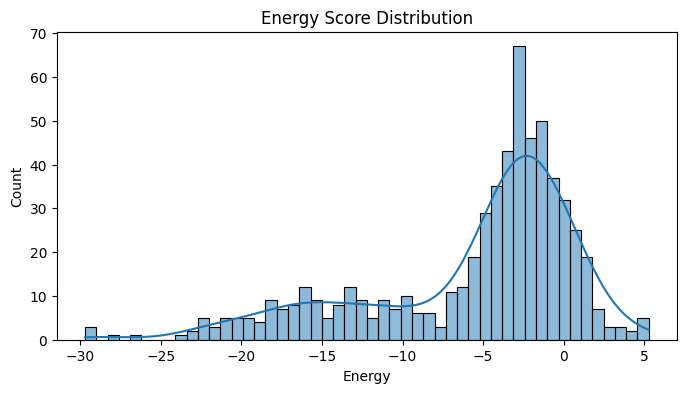

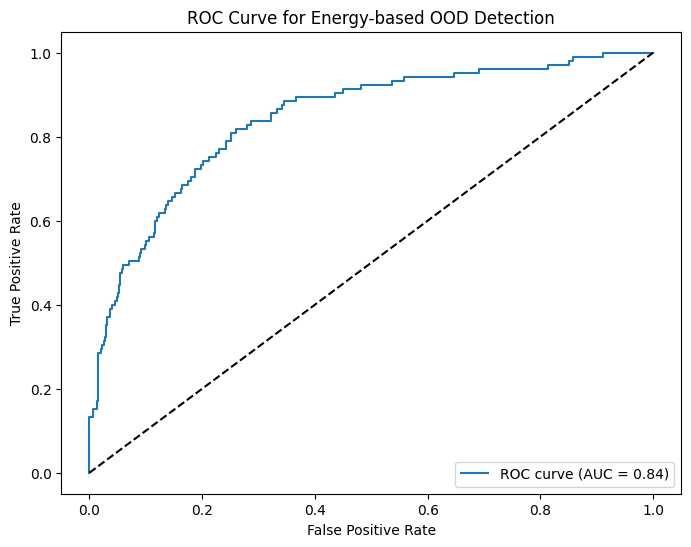

자동 선택된 임계값 (Energy 기준): -2.1203
수동으로 입력한 임계값: -2.1203

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       0.96      0.94      0.95       100
Motorcycle Running Sound       0.97      0.38      0.55       100
            Vehicle Horn       0.98      0.84      0.90       100
           Vehicle Siren       0.88      0.91      0.89       100
   Vehicle Running Sound       0.86      0.54      0.66       100
                 Unknown       0.40      0.81      0.53       105

                accuracy                           0.74       605
               macro avg       0.84      0.74      0.75       605
            weighted avg       0.84      0.74      0.75       605



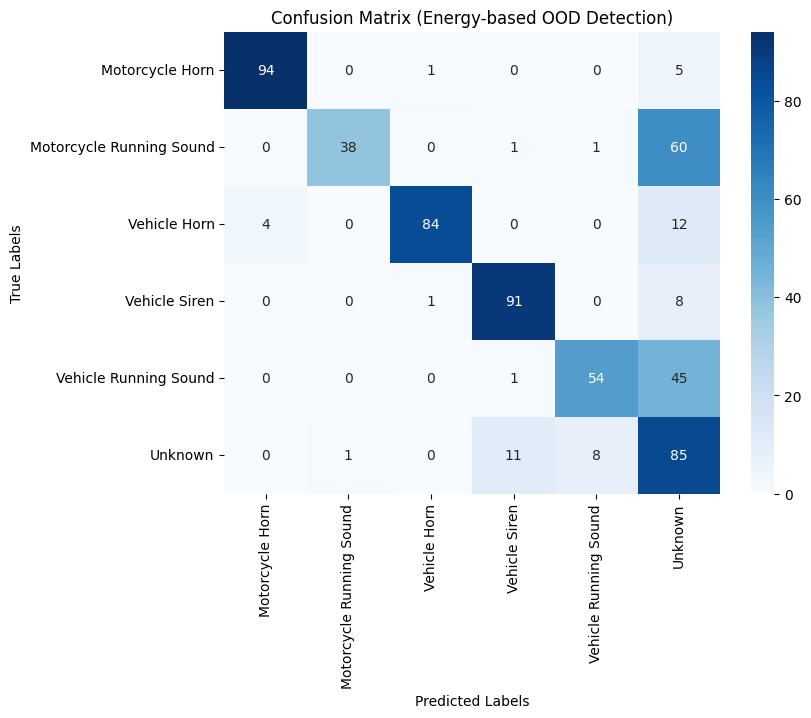

Overall Accuracy: 0.7372
샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -22.9851
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -16.3780
샘플 2: 실제 = 이륜차경적, 예측 = 기타소음, Energy Score = -2.0078
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -13.3183
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -26.3527
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -20.6238
샘플 6: 실제 = 이륜차경적, 예측 = 기타소음, Energy Score = -1.9260
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -19.5404
샘플 8: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -9.3016
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적, Energy Score = -20.0159


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
import math

# =====================================================
# 0. 데이터 로드 (사용자 환경에 맞게 진행)
# =====================================================
# 예: df_balanced_odd_sampled = pd.read_csv('df_balanced_odd_sampled.csv')
# 이 DataFrame은 'ood_label' 컬럼과 'mfcc_1', 'mfcc_2', …, 'mfcc_50' 컬럼을 포함해야 합니다.

# =====================================================
# 1. 모델 로드 및 logits 모델 생성
# =====================================================
# 기존 모델은 마지막 Dense 레이어에 softmax activation이 있으므로, 이를 제거하여 logits를 반환하는 모델을 생성합니다.
resnet_model = load_model('resnet_model_mfcc50.h5')

# 모델 내 Dropout 레이어 확인 (옵션)
print("=== Dropout Layers in the Model ===")
for layer in resnet_model.layers:
    if 'dropout' in layer.name.lower():
        print(f"Dropout Layer: {layer.name}, Rate: {layer.rate}")

# 마지막 레이어 확인
last_layer = resnet_model.layers[-1]
print("Last layer config:", last_layer.get_config())

# 만약 마지막 레이어가 Dense with softmax activation, 새로운 Dense 레이어 (활성화 없음)로 교체합니다.
if last_layer.get_config().get("activation") == "softmax":
    # logits_model: 마지막 softmax를 제거하고, 동일한 weights를 사용해 로그잇을 반환하도록 함.
    logits = Dense(last_layer.units, activation=None, name='logits')(resnet_model.layers[-2].output)
    logits_model = Model(inputs=resnet_model.input, outputs=logits)
    # 기존 마지막 레이어의 weights 세팅
    logits_model.layers[-1].set_weights(last_layer.get_weights())
else:
    # 만약 마지막 레이어가 이미 logits를 반환하는 경우.
    logits_model = resnet_model

# =====================================================
# 2. Energy Score 계산 함수
# =====================================================
def compute_energy(logits, T=1.0):
    """
    Energy Score 계산:
        E(x) = -T * log ( sum(exp(logits/T)) )
    """
    # logits: (num_samples, num_classes)
    exp_vals = np.exp(logits / T)
    sum_exp = np.sum(exp_vals, axis=1)  + 1e-9  # 미세한 안정성 추가
    energy = -T * np.log(sum_exp)
    return energy

# =====================================================
# 3. 데이터 및 라벨 매핑 확인
# =====================================================
print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())

# 모델이 학습한 정상 클래스 5개 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown(기타소음)은 5번 클래스로 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩: 매핑에 없는 값은 Unknown으로 처리
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values
print("Encoded y_true_ood:", y_true_ood)

# =====================================================
# 4. 입력 데이터 준비 및 확인
# =====================================================
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"모델의 입력 형태: {resnet_model.input_shape}, 입력 데이터의 형태: {X_test.shape}")

# =====================================================
# 5. Logits 및 Energy Score 계산
# =====================================================
# logits 계산
logits = logits_model.predict(X_test)
# Energy Score 계산 (T=1.0)
energy_scores = compute_energy(logits, T=1.0)

# 에너지 점수 분포 시각화
plt.figure(figsize=(8,4))
sns.histplot(energy_scores, bins=50, kde=True)
plt.title("Energy Score Distribution")
plt.xlabel("Energy")
plt.show()

# =====================================================
# 6. Softmax 예측 및 기본 예측 라벨
# =====================================================
# Softmax 값는 logits에서 직접 계산
exp_logits = np.exp(logits)
softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
y_pred_basic = np.argmax(softmax_probs, axis=1)

# =====================================================
# 7. 임계값 결정 (자동 vs 수동)
# =====================================================
# 자동 임계값 결정 (ROC Curve 사용)
# "is_ood" 타겟: 실제 라벨이 Unknown이면 1, 그 외 0
is_ood = (y_true_ood == unknown_label_index).astype(int)
fpr, tpr, thresholds = roc_curve(is_ood, energy_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve for Energy-based OOD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 자동으로 임계값 선택 (Youden’s J statistic)
j_scores = tpr - fpr
auto_threshold = thresholds[np.argmax(j_scores)]
print(f"자동 선택된 임계값 (Energy 기준): {auto_threshold:.4f}")

# 수동 임계값 입력 (예: 0.0 ~ 10.0의 범위, 데이터 분포에 따라 조정)
# 에너지 분포를 보고 선택: 예를 들어,  auto_threshold 근방의 값을 직접 조정
manual_threshold = auto_threshold  # 또는 사용자가 직접 다른 값을 입력: 예:  -5.0, -8.0 등
print(f"수동으로 입력한 임계값: {manual_threshold:.4f}")

# =====================================================
# 8. 최종 예측 결과 결정
# =====================================================
# Energy_score가 manual_threshold보다 _높으면_ (OOD 특성에 따라, 논문에 따라 방향이 달라짐)
# 여기서는 에너지가 높은 경우 OOD (Unknown)으로 판단하도록 하겠습니다.
y_pred_labels_final = np.where(energy_scores > manual_threshold, unknown_label_index, y_pred_basic)

# =====================================================
# 9. 평가: 분류 보고서, 혼동 행렬, 정확도
# =====================================================
# 한글 및 영어 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\nClassification Report:")
report = classification_report(y_true_ood, y_pred_labels_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true_ood, y_pred_labels_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (Energy-based OOD Detection)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true_ood, y_pred_labels_final)
print(f"Overall Accuracy: {acc:.4f}")

# =====================================================
# 10. 일부 샘플 예측 결과 출력
# =====================================================
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_labels_final[i]]
    eng = energy_scores[i]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}, Energy Score = {eng:.4f}")

# V. OpenMax (스켈레톤) 코드

=== Dropout Layers in the Model ===
Unique ood_label values: ['이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음' '기타소음']
Encoded y_true_ood: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

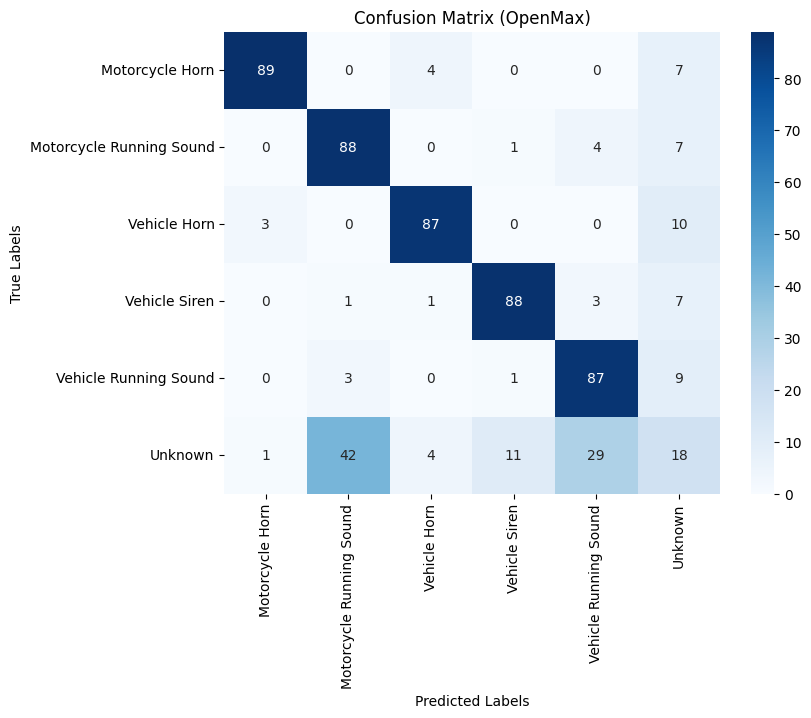

Overall Accuracy: 0.7554
샘플 0: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 1: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 2: 실제 = 이륜차경적, 예측 = 차량경적
샘플 3: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 4: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 5: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 6: 실제 = 이륜차경적, 예측 = 차량경적
샘플 7: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 8: 실제 = 이륜차경적, 예측 = 이륜차경적
샘플 9: 실제 = 이륜차경적, 예측 = 이륜차경적


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from scipy.stats import weibull_min, entropy

#############################################
# 0. 데이터 및 모델 로드 (사용자 환경에 맞게)
#############################################
# 예시) df_balanced_odd_sampled = pd.read_csv("df_balanced_odd_sampled.csv")
# df_balanced_odd_sampled는 'ood_label'과 'mfcc_1' ~ 'mfcc_50' 컬럼을 포함
# (데이터 로드는 여기서 가정)

#############################################
# 1. 모델 로드 및 logits(또는 임베딩) 모델 생성
#############################################
resnet_model = load_model('resnet_model_mfcc50.h5')

# OpenMax는 마지막 softmax 때 출력되는 확률 대신, penultimate layer의 임베딩을 사용합니다.
# 여기서는 마지막 dense 레이어 바로 전 layer를 임베딩으로 사용합니다.
embedding_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

# 만약 모델에 Dropout 레이어가 있다면 확인
print("=== Dropout Layers in the Model ===")
for layer in resnet_model.layers:
    if 'dropout' in layer.name.lower():
        print(f"Dropout Layer: {layer.name}, Rate: {layer.rate}")

#############################################
# 2. 데이터 및 라벨 매핑 확인
#############################################
print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())

# 모델이 학습한 5개 정상 클래스 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown(기타소음) 클래스에 인덱스 5 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩: 매핑에 없는 값은 Unknown으로 처리
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true_ood = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values
print("Encoded y_true_ood:", y_true_ood)

#############################################
# 3. 입력 데이터 준비 및 형태 확인
#############################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"모델의 입력 형태: {resnet_model.input_shape}, 입력 데이터의 형태: {X_test.shape}")

#############################################
# 4. 학습 데이터(정상) 준비: OpenMax의 Weibull 피팅용
#############################################
# OpenMax는 정상(known) 클래스의 분포 정보를 필요로 함.
# df_balanced_odd_sampled에서 '기타소음' 제외한 데이터 활용 (즉, 정상 클래스만)
df_known = df_balanced_odd_sampled[df_balanced_odd_sampled['ood_label'] != '기타소음']
X_known = df_known[mfcc_columns].values
X_known = X_known.reshape((X_known.shape[0], X_known.shape[1], 1))
# 정상 클래스 라벨 인코딩
y_known = df_known['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

# 임베딩 추출 (정상 데이터)
embeddings_known = embedding_model.predict(X_known)

#############################################
# 5. 각 정상 클래스에 대해 Weibull 모델 피팅
#############################################
tail_size = 20  # tail size 조정 가능
weibull_models = {}   # 클래스별 Weibull 모델 파라미터 저장
class_means = {}      # 각 클래스의 임베딩 평균 저장

for cls in range(5):  # 정상 클래스 코드 0~4만 사용
    # 정상 데이터의 해당 클래스만 선택
    cls_indices = np.where(y_known == cls)[0]
    if len(cls_indices) == 0:
        continue
    cls_embeddings = embeddings_known[cls_indices]
    # 클래스 평균 임베딩 계산
    cls_mean = np.mean(cls_embeddings, axis=0)
    class_means[cls] = cls_mean
    # 각 샘플과 클래스 평균 간 Euclidean 거리 계산
    distances = np.linalg.norm(cls_embeddings - cls_mean, axis=1)
    # tail_size가 너무 크면 전체 데이터 수보다 작아지므로 조정
    tail = np.sort(distances)[-min(tail_size, len(distances)):]
    # Weibull 모델 피팅 (floc=0 옵션)
    params = weibull_min.fit(tail, floc=0)
    weibull_models[cls] = params

#############################################
# 6. OpenMax 점수 조정 함수
#############################################
def compute_openmax_scores(softmax_probs, embeddings, class_means, weibull_models, alpharank=10):
    """
    각 테스트 샘플에 대해, 각 클래스에 대한 score를 조정합니다.
    softmax_probs: 원래 모델 softmax 확률 (num_samples x num_classes)
    embeddings: 테스트 샘플의 임베딩 (num_samples x embedding_dim)
    class_means: 각 클래스의 평균 임베딩 (dict: 클래스 -> 벡터)
    weibull_models: 각 클래스의 Weibull 모델 파라미터 (dict: 클래스 -> params)
    alpharank: 상위 몇 개 클래스에 대해 조정할지 결정 (예: 10)
    
    출력: 수정된 score 배열 (num_samples x num_classes)
    """
    modified_scores = np.copy(softmax_probs)
    num_samples = embeddings.shape[0]
    num_classes = softmax_probs.shape[1]
    
    for i in range(num_samples):
        # 각 샘플의 임베딩
        emb = embeddings[i]
        # 각 클래스에 대해, 클래스 평균과의 거리를 계산하고 Weibull CDF를 구함.
        for cls in range(num_classes):
            if cls not in class_means: 
                continue
            distance = np.linalg.norm(emb - class_means[cls])
            params = weibull_models.get(cls, None)
            if params is not None:
                # Weibull CDF 값 계산: cdf(distance)
                wscore = weibull_min.cdf(distance, *params)
                # 수정: softmax 확률에서 일부를 빼서 Unknown 확률에 더함
                # 실제 구현에서는 상위 alpharank 클래스에 대해서만 조정할 수 있으나, 여기서는 모든 클래스에 적용
                modified_scores[i, cls] = softmax_probs[i, cls] * (1 - wscore)
                
    return modified_scores

#############################################
# 7. 테스트 데이터 임베딩 및 Softmax 계산
#############################################
# 테스트 데이터 임베딩 추출
embeddings_test = embedding_model.predict(X_test)

# 기존 모델 softmax 확률 계산: logits model의 마지막 layer에서 softmax는 이미 적용된 상태이므로,
# 아니면 직접 softmax를 계산
# 여기서는 softmax_probs는 resnet_model.predict(X_test)로 얻은 값 (6개 클래스 중 단, 원래 모델은 5개 출력을 내므로, Unknown은 0)
softmax_probs = resnet_model.predict(X_test)  # shape: (num_samples, 5)

# (참고: 모델은 원래 5개 클래스로 학습하였으므로, softmax_probs는 5개 값으로 나오며, Unknown은 후처리로 결정됨)

#############################################
# 8. OpenMax score 조정 및 Unknown score 계산
#############################################
# OpenMax 방식으로 각 클래스 확률 조정
modified_scores = compute_openmax_scores(softmax_probs, embeddings_test, class_means, weibull_models, alpharank=10)
# 각 샘플에 대해, 기존 점수와 수정된 점수 간 차이를 Unknown score로 계산
# Unknown score = sum(original softmax_prob * (1 - (수정 비율))) = sum(softmax_prob) - sum(modified_scores)
unknown_scores = np.sum(softmax_probs, axis=1) - np.sum(modified_scores, axis=1)

# OpenMax 확률 벡터 구성 (정상 클래스 5개 + Unknown)
openmax_probs = np.hstack([modified_scores, unknown_scores.reshape(-1, 1)])
# 정규화
openmax_probs /= np.sum(openmax_probs, axis=1, keepdims=True)

# 최종 예측: argmax
y_pred_openmax = np.argmax(openmax_probs, axis=1)

#############################################
# 9. 평가: 분류 보고서, 혼동 행렬, 정확도 등
#############################################
# 한글 및 영어 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Unknown'
}
english_labels = [label_mapping[label] for label in labels_in_order]

print("\n--- OpenMax Classification Report ---")
report = classification_report(y_true_ood, y_pred_openmax, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true_ood, y_pred_openmax)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix (OpenMax)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true_ood, y_pred_openmax)
print(f"Overall Accuracy: {acc:.4f}")

#############################################
# 10. 일부 샘플 예측 결과 출력
#############################################
for i in range(10):
    true_lbl = index_to_label[y_true_ood[i]]
    pred_lbl = index_to_label[y_pred_openmax[i]]
    print(f"샘플 {i}: 실제 = {true_lbl}, 예측 = {pred_lbl}")


# VI. Feature-based Anomaly Detection using One-Class SVM

Unique ood_label values: ['이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음' '기타소음']
Encoded y_true: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4

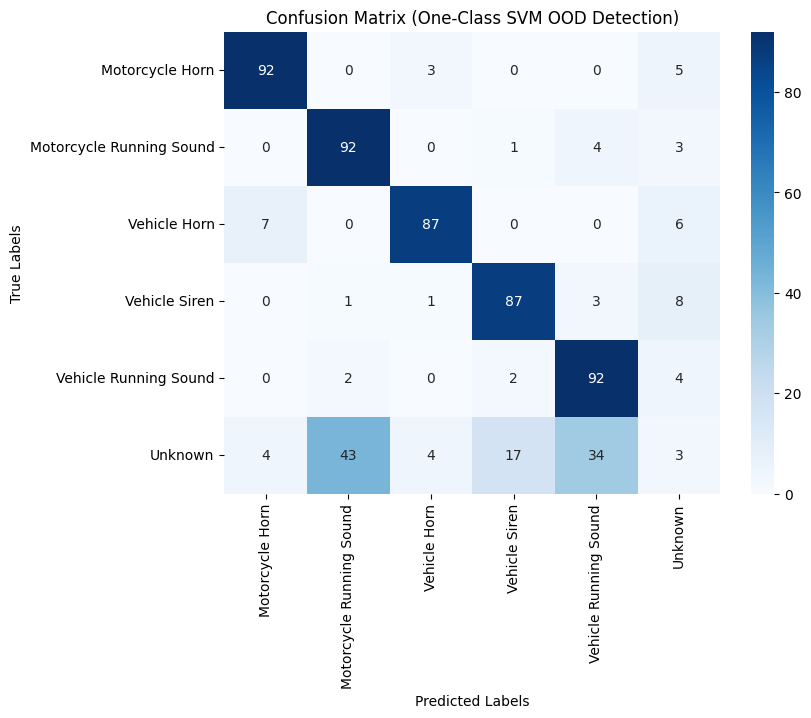

Overall Accuracy: 0.7488
Sample 0: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 1: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 2: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 3: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 4: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 5: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 6: True = 이륜차경적, Predicted = 차량경적, SVM Output = 1
Sample 7: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 8: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1
Sample 9: True = 이륜차경적, Predicted = 이륜차경적, SVM Output = 1


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import OneClassSVM

###################################################
# 0. 데이터 로드 및 전처리 (사용자 환경에 맞게)
###################################################
# 예시: df_balanced_odd_sampled = pd.read_csv('df_balanced_odd_sampled.csv')
# 이 DataFrame은 'ood_label'과 'mfcc_1', 'mfcc_2', …, 'mfcc_50' 컬럼을 포함해야 합니다.

###################################################
# 1. 라벨 매핑 설정
###################################################
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}
# Unknown(기타소음) 클래스는 6번째 클래스로 할당
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 실제 라벨 인코딩 (모델이 학습하지 않은 값도 Unknown으로 처리)
y_true_ood_str = df_balanced_odd_sampled['ood_label']
y_true = y_true_ood_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values

print("Unique ood_label values:", df_balanced_odd_sampled['ood_label'].unique())
print("Encoded y_true:", y_true)

###################################################
# 2. 입력 데이터 준비
###################################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_all = df_balanced_odd_sampled[mfcc_columns].values
X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], 1))
print(f"Input data shape: {X_all.shape}")

###################################################
# 3. 모델 로드 및 임베딩 모델 생성
###################################################
# 기본 분류 모델 로드 (원래 5개 클래스 softmax 출력)
resnet_model = load_model('resnet_model_mfcc50.h5')
print("Model input shape:", resnet_model.input_shape)

# Open‑set 인식을 위해 penultimate layer의 출력을 임베딩으로 사용
embedding_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-2].output)

###################################################
# 4. 정상(known) 데이터(기타소음 제외) 준비 및 임베딩 추출
###################################################
# 정상 데이터: 'ood_label'이 기타소음("기타소음")이 아닌 데이터만 선택
df_known = df_balanced_odd_sampled[df_balanced_odd_sampled['ood_label'] != '기타소음']
X_known = df_known[mfcc_columns].values
X_known = X_known.reshape((X_known.shape[0], X_known.shape[1], 1))
# 정상 데이터 라벨 인코딩 (이미 0~4)
y_known = df_known['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index)).values

# 임베딩 추출 (정상 데이터)
embeddings_known = embedding_model.predict(X_known)
print(f"Embeddings shape (known): {embeddings_known.shape}")

###################################################
# 5. One-Class SVM 학습 (정상 데이터 임베딩 활용)
###################################################
# One-Class SVM: 정상 데이터의 분포만 학습하여, 새로운 샘플이 이 분포와 얼마나 다른지 판단
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
ocsvm.fit(embeddings_known)
print("One-Class SVM 학습 완료.")

###################################################
# 6. 테스트 데이터 임베딩 추출 및 SVM 예측
###################################################
# 테스트 데이터(전체 데이터) 임베딩 추출
embeddings_all = embedding_model.predict(X_all)
print(f"Embeddings shape (all): {embeddings_all.shape}")

# One-Class SVM으로 예측: 정상은 1, 이상(즉, unknown)인 경우 -1 반환
svm_pred = ocsvm.predict(embeddings_all)
print("SVM 예측 결과 (예시):", svm_pred[:10])

###################################################
# 7. 기본 분류 모델의 softmax 예측 (정상 5개 클래스 예측)
###################################################
softmax_probs = resnet_model.predict(X_all)  # shape: (num_samples, 5)
pred_labels_known = np.argmax(softmax_probs, axis=1)  # 0~4

###################################################
# 8. 최종 예측: One-Class SVM 결과와 결합
###################################################
# 만약 SVM에서 이상치(-1)로 판단하면 Unknown (index 5)으로 할당, 정상(1)이면 기본 분류 예측을 사용
y_pred_final = np.where(svm_pred == -1, unknown_label_index, pred_labels_known)

###################################################
# 9. 평가: 분류 보고서, 혼동 행렬, 정확도 출력
###################################################
# 한글 라벨 매핑, 영어 라벨 매핑
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]
english_labels = [
    'Motorcycle Horn', 
    'Motorcycle Running Sound', 
    'Vehicle Horn', 
    'Vehicle Siren', 
    'Vehicle Running Sound', 
    'Unknown'
]

print("\n--- One-Class SVM OOD Detection Classification Report ---")
report = classification_report(y_true, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (One-Class SVM OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

acc = accuracy_score(y_true, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

###################################################
# 10. 일부 샘플 예측 결과 출력
###################################################
for i in range(10):
    true_lbl = index_to_label[y_true[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    svm_out = svm_pred[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, SVM Output = {svm_out}")


# VII. Deep Ensemble Approach

학습 데이터 유니크 라벨: ['차량경적' '차량사이렌' '차량주행음' '이륜차경적' '이륜차주행음']
학습 데이터 인코딩 예시: 0    2
1    2
2    2
3    2
4    2
Name: encoded_label, dtype: int64
Test data shape: (605, 50, 1)
Epoch 1/20


2025-03-04 18:30:17.489929: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x22897c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-04 18:30:17.489976: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-04 18:30:17.592687: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-04 18:30:17.592834: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 12/455 [..............................] - ETA: 2s - loss: 1.2275 - accuracy: 0.5703   

2025-03-04 18:30:18.036830: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


455/455 [==============================] - 4s 5ms/step - loss: 0.3042 - accuracy: 0.8855 - val_loss: 0.1273 - val_accuracy: 0.9709
Epoch 2/20
455/455 [==============================] - 2s 4ms/step - loss: 0.1881 - accuracy: 0.9281 - val_loss: 0.4960 - val_accuracy: 0.8069
Epoch 3/20
455/455 [==============================] - 2s 4ms/step - loss: 0.1571 - accuracy: 0.9384 - val_loss: 0.1242 - val_accuracy: 0.9635
Epoch 4/20
455/455 [==============================] - 2s 4ms/step - loss: 0.1357 - accuracy: 0.9481 - val_loss: 0.1203 - val_accuracy: 0.9592
Epoch 5/20
455/455 [==============================] - 2s 4ms/step - loss: 0.1255 - accuracy: 0.9512 - val_loss: 0.0940 - val_accuracy: 0.9709
Epoch 6/20
455/455 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9556 - val_loss: 0.0968 - val_accuracy: 0.9709
Epoch 7/20
455/455 [==============================] - 2s 4ms/step - loss: 0.1030 - accuracy: 0.9600 - val_loss: 0.1103 - val_accuracy: 0.9647
Epoch 8/20
455/45

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


455/455 [==============================] - 2s 2ms/step - loss: 0.5126 - accuracy: 0.8514 - val_loss: 0.2607 - val_accuracy: 0.9072
Epoch 2/20
455/455 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8969 - val_loss: 0.3843 - val_accuracy: 0.8595
Epoch 3/20
455/455 [==============================] - 1s 2ms/step - loss: 0.2503 - accuracy: 0.9122 - val_loss: 0.1724 - val_accuracy: 0.9344
Epoch 4/20
455/455 [==============================] - 1s 2ms/step - loss: 0.2329 - accuracy: 0.9188 - val_loss: 0.1442 - val_accuracy: 0.9585
Epoch 5/20
455/455 [==============================] - 1s 2ms/step - loss: 0.2202 - accuracy: 0.9207 - val_loss: 0.2078 - val_accuracy: 0.9103
Epoch 6/20
455/455 [==============================] - 1s 2ms/step - loss: 0.2056 - accuracy: 0.9266 - val_loss: 0.0836 - val_accuracy: 0.9777
Epoch 7/20
455/455 [==============================] - 1s 2ms/step - loss: 0.1881 - accuracy: 0.9331 - val_loss: 0.2322 - val_accuracy: 0.9066
Epoch 8/20
455/45

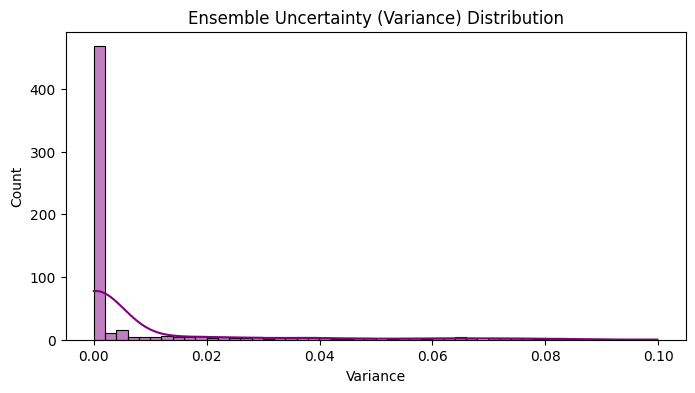

Manual uncertainty threshold: 0.05

--- Deep Ensemble Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.92      0.95      0.94       100
Motorcycle Running Sound       0.68      0.93      0.78       100
            Vehicle Horn       0.94      0.93      0.93       100
           Vehicle Siren       0.86      0.92      0.89       100
   Vehicle Running Sound       0.74      0.93      0.83       100
                 Unknown       0.71      0.23      0.35       105

                accuracy                           0.81       605
               macro avg       0.81      0.81      0.79       605
            weighted avg       0.81      0.81      0.78       605



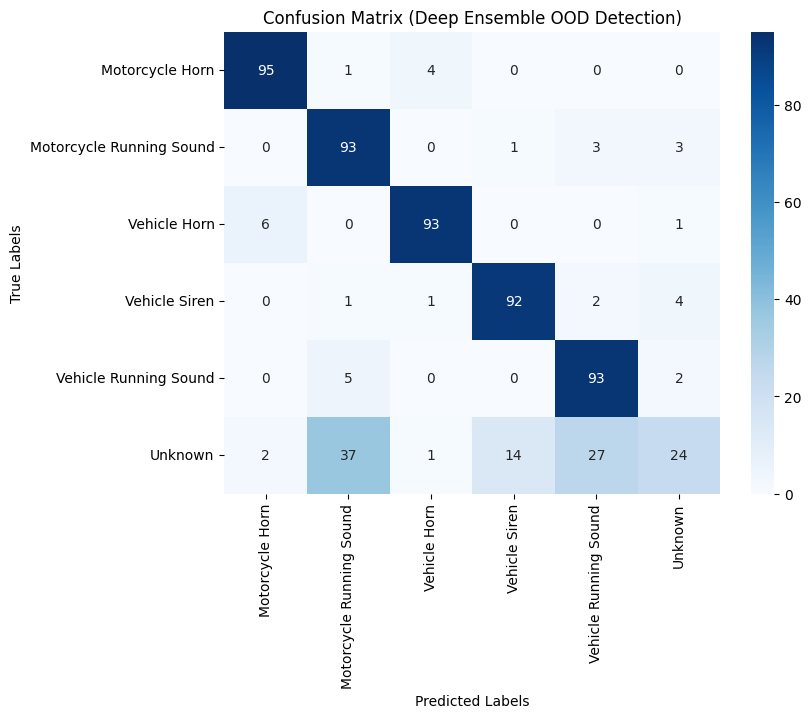

Overall Accuracy: 0.8099
Sample 0: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 1: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 2: True = 이륜차경적, Predicted = 차량경적, Uncertainty = 0.0051
Sample 3: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 4: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 5: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 6: True = 이륜차경적, Predicted = 차량경적, Uncertainty = 0.0405
Sample 7: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 8: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000
Sample 9: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#############################################
# Part 0: 데이터 로드 및 전처리
#############################################
# 학습 데이터: train_data.csv -> 라벨 컬럼: "category_03" (소문자)
train_df = pd.read_csv("train_data.csv")

# 테스트 데이터: df_balanced_odd_sampled.csv 또는 다른 파일 (가령, "test_data.csv") 
# 테스트 데이터에는 라벨 컬럼 이름이 "ood_label"이라고 가정합니다.
test_df = pd.read_csv("df_balanced_odd_sampled.csv")  # 파일 이름은 사용자 환경에 맞게 변경

#############################################
# Part 1: 라벨 매핑 및 인코딩
#############################################
# 정상 클래스 5개와 Unknown 클래스 설정
label_list = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
label_to_code = {label: i for i, label in enumerate(label_list)}
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 학습 데이터: "category_03" 컬럼 사용 (소문자 c)
if 'category_03' in train_df.columns:
    train_df['encoded_label'] = train_df['category_03'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("train_data.csv에 'category_03' 컬럼이 없습니다.")
print("학습 데이터 유니크 라벨:", train_df['category_03'].unique())
print("학습 데이터 인코딩 예시:", train_df['encoded_label'].head())

# 테스트 데이터: "ood_label" 컬럼 사용
if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")
y_test_true = test_df['encoded_label'].values

#############################################
# Part 2: 입력 데이터 준비 (MFCC 특징)
#############################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
# 학습 데이터 입력
X_train = train_df[mfcc_columns].values
y_train = train_df['encoded_label'].values
# 학습데이터에서는 정상 클래스만 사용한다고 가정(0~4)
y_train_cat = to_categorical(y_train, num_classes=5)

# 테스트 데이터 입력
X_test = test_df[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"Test data shape: {X_test.shape}")

#############################################
# Part 3: 모델 정의 & 학습 (Basic CNN & Light BGM)
#############################################
def build_basic_cnn(input_shape, num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv1D(32, 3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(64, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_light_bgm(input_shape, num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv1D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 학습 데이터 재구성: X_train의 shape (num_samples, 50) -> (num_samples, 50, 1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

try:
    basic_cnn = load_model('basic_cnn.h5')
    print("basic_cnn 모델 로드 완료.")
except Exception as e:
    basic_cnn = build_basic_cnn(input_shape=X_train_cnn.shape[1:], num_classes=5)
    basic_cnn.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
    basic_cnn.save("basic_cnn.h5")
    print("basic_cnn 모델 학습 완료 및 저장.")

try:
    light_bgm = load_model('light_bgm.h5')
    print("light_bgm 모델 로드 완료.")
except Exception as e:
    light_bgm = build_light_bgm(input_shape=X_train_cnn.shape[1:], num_classes=5)
    light_bgm.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
    light_bgm.save("light_bgm.h5")
    print("light_bgm 모델 학습 완료 및 저장.")

#############################################
# Part 4: 이미 학습된 ResNet 모델 불러오기
#############################################
resnet_model = load_model('resnet_model_mfcc50.h5')
print("resnet_model_mfcc50.h5 로드 완료.")

#############################################
# Part 5: Deep Ensemble 구성
#############################################
ensemble_models = [resnet_model, basic_cnn, light_bgm]
print(f"총 앙상블 모델 수: {len(ensemble_models)}")

all_preds = []
for model in ensemble_models:
    preds = model.predict(X_test)  # 각 모델의 예측: (num_samples, 5)
    all_preds.append(preds)
all_preds = np.array(all_preds)  # shape: (num_models, num_samples, 5)
ensemble_probs = np.mean(all_preds, axis=0)  # (num_samples, 5)
y_pred_basic = np.argmax(ensemble_probs, axis=1)

#############################################
# Part 6: Ensemble 불확실성 산출 (예측 분산 기반)
#############################################
ensemble_variance = np.var(all_preds, axis=0)  # (num_samples, 5)
uncertainty = np.mean(ensemble_variance, axis=1)  # 각 샘플에 대한 평균 분산

plt.figure(figsize=(8,4))
sns.histplot(uncertainty, bins=50, kde=True, color='purple')
plt.title("Ensemble Uncertainty (Variance) Distribution")
plt.xlabel("Variance")
plt.show()

#############################################
# Part 7: 최종 예측 결합 (불확실성이 높으면 Unknown으로 할당)
#############################################
manual_threshold = 0.05   # 실험적으로 조정: 0.03 ~ 0.1 범위에서
print("Manual uncertainty threshold:", manual_threshold)
y_pred_final = np.where(uncertainty > manual_threshold, unknown_label_index, y_pred_basic)

#############################################
# Part 8: 평가 (분류 보고서, 혼동 행렬, 정확도)
#############################################
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn',
                  'Vehicle Siren', 'Vehicle Running Sound', 'Unknown']
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

print("\n--- Deep Ensemble Classification Report ---")
report = classification_report(y_true, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (Deep Ensemble OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

acc = accuracy_score(y_true, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

#############################################
# Part 9: 일부 샘플 예측 결과 출력
#############################################
for i in range(10):
    true_lbl = index_to_label[y_true[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    uncert = uncertainty[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Uncertainty = {uncert:.4f}")


학습 데이터 유니크 라벨: ['차량경적' '차량사이렌' '차량주행음' '이륜차경적' '이륜차주행음']
학습 데이터 인코딩 예시: 0    2
1    2
2    2
3    2
4    2
Name: encoded_label, dtype: int64
Test data shape: (605, 50, 1)
basic_cnn 모델 로드 완료.
light_bgm 모델 로드 완료.
resnet_model_mfcc50.h5 로드 완료.
총 앙상블 모델 수: 3
19/19 [==============================] - 0s 1ms/step


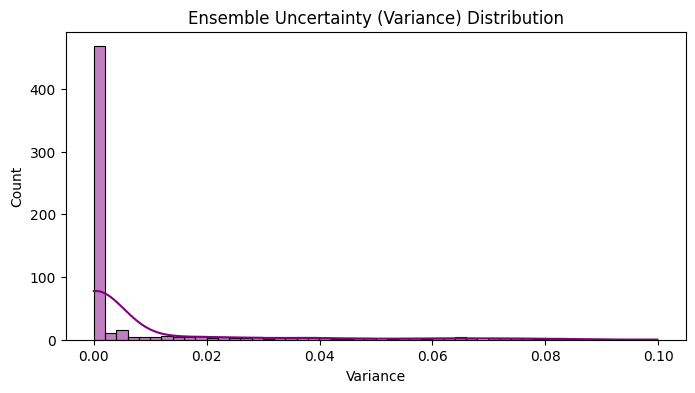

Manual uncertainty threshold: 0.05
Manual confidence threshold: 0.7

--- Deep Ensemble Classification Report ---
                          precision    recall  f1-score   support

         Motorcycle Horn       0.92      0.95      0.94       100
Motorcycle Running Sound       0.68      0.93      0.78       100
            Vehicle Horn       0.94      0.93      0.93       100
           Vehicle Siren       0.85      0.93      0.89       100
   Vehicle Running Sound       0.73      0.93      0.82       100
                 Unknown       0.70      0.20      0.31       105

                accuracy                           0.81       605
               macro avg       0.80      0.81      0.78       605
            weighted avg       0.80      0.81      0.78       605



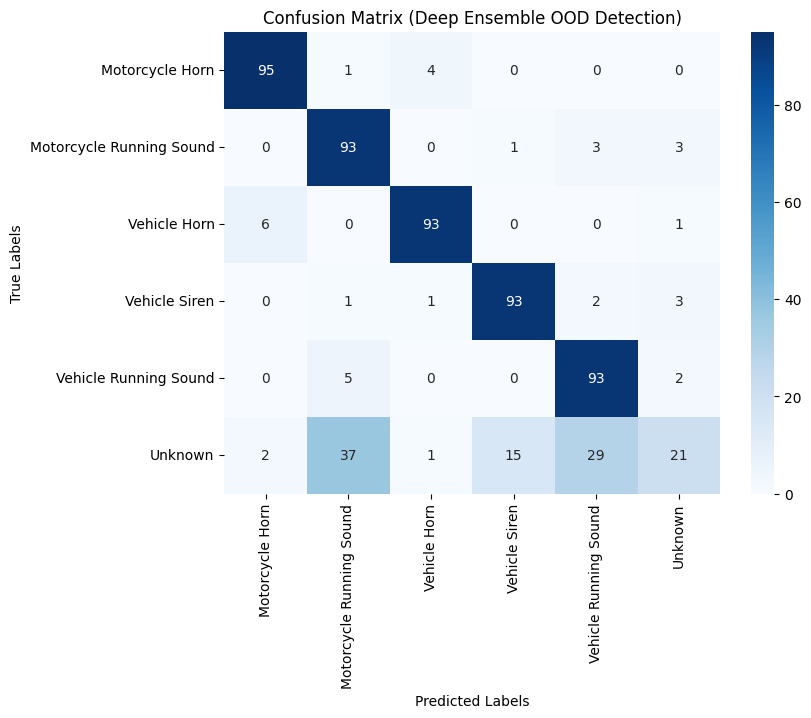

Overall Accuracy: 0.8066
Sample 0: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 1: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 2: True = 이륜차경적, Predicted = 차량경적, Uncertainty = 0.0051, Max Prob = 0.5832
Sample 3: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 4: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 5: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 6: True = 이륜차경적, Predicted = 차량경적, Uncertainty = 0.0405, Max Prob = 0.6370
Sample 7: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 8: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000
Sample 9: True = 이륜차경적, Predicted = 이륜차경적, Uncertainty = 0.0000, Max Prob = 1.0000


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0: 데이터 로드 및 전처리
#############################################
# 학습 데이터: train_data.csv (라벨 컬럼: "category_03", MFCC 컬럼: mfcc_1 ~ mfcc_50)
train_df = pd.read_csv("train_data.csv")
# 테스트 데이터: df_balanced_odd_sampled.csv (라벨 컬럼: "ood_label")
test_df = pd.read_csv("df_balanced_odd_sampled.csv")

#############################################
# Part 1: 라벨 매핑 및 인코딩
#############################################
# 정상 클래스 5개: '이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'
label_list = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
label_to_code = {label: i for i, label in enumerate(label_list)}
unknown_label_index = 5
label_to_code['기타소음'] = unknown_label_index

# 학습 데이터: 라벨 컬럼은 "category_03" (소문자 'c')
if 'category_03' in train_df.columns:
    train_df['encoded_label'] = train_df['category_03'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("train_data.csv에 'category_03' 컬럼이 없습니다.")
print("학습 데이터 유니크 라벨:", train_df['category_03'].unique())
print("학습 데이터 인코딩 예시:", train_df['encoded_label'].head())

# 테스트 데이터: 라벨 컬럼은 "ood_label"
if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")
y_true = test_df['encoded_label'].values

#############################################
# Part 2: 입력 데이터 준비 (MFCC 특징)
#############################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
# 학습 데이터 입력 (여기서 학습은 정상 클래스만 사용한다고 가정)
X_train = train_df[mfcc_columns].values
y_train = train_df['encoded_label'].values
# 정상 클래스에 대해 one-hot encoding (0~4)
y_train_cat = to_categorical(y_train, num_classes=5)

# 테스트 데이터 입력
X_test = test_df[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(f"Test data shape: {X_test.shape}")

#############################################
# Part 3: 모델 정의 & 학습 (Basic CNN & Light BGM)
#############################################
def build_basic_cnn(input_shape, num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv1D(32, 3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(64, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_light_bgm(input_shape, num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv1D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 학습 데이터 재구성: X_train의 shape (num_samples, 50) -> (num_samples, 50, 1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

try:
    basic_cnn = load_model('basic_cnn.h5')
    print("basic_cnn 모델 로드 완료.")
except Exception as e:
    basic_cnn = build_basic_cnn(input_shape=X_train_cnn.shape[1:], num_classes=5)
    basic_cnn.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
    basic_cnn.save("basic_cnn.h5")
    print("basic_cnn 모델 학습 완료 및 저장.")

try:
    light_bgm = load_model('light_bgm.h5')
    print("light_bgm 모델 로드 완료.")
except Exception as e:
    light_bgm = build_light_bgm(input_shape=X_train_cnn.shape[1:], num_classes=5)
    light_bgm.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
    light_bgm.save("light_bgm.h5")
    print("light_bgm 모델 학습 완료 및 저장.")

#############################################
# Part 4: 이미 학습된 ResNet 모델 불러오기
#############################################
resnet_model = load_model('resnet_model_mfcc50.h5')
print("resnet_model_mfcc50.h5 로드 완료.")

#############################################
# Part 5: Deep Ensemble 구성
#############################################
ensemble_models = [resnet_model, basic_cnn, light_bgm]
print(f"총 앙상블 모델 수: {len(ensemble_models)}")

all_preds = []
for model in ensemble_models:
    preds = model.predict(X_test)  # 각 모델의 예측: (num_samples, 5)
    all_preds.append(preds)
all_preds = np.array(all_preds)  # shape: (num_models, num_samples, 5)
ensemble_probs = np.mean(all_preds, axis=0)  # (num_samples, 5)
y_pred_basic = np.argmax(ensemble_probs, axis=1)

#############################################
# Part 6: Ensemble 불확실성 산출 (예측 분산 기반)
#############################################
ensemble_variance = np.var(all_preds, axis=0)  # (num_samples, 5)
uncertainty = np.mean(ensemble_variance, axis=1)  # 각 샘플에 대한 평균 분산

plt.figure(figsize=(8,4))
sns.histplot(uncertainty, bins=50, kde=True, color='purple')
plt.title("Ensemble Uncertainty (Variance) Distribution")
plt.xlabel("Variance")
plt.show()

#############################################
# Part 7: 최종 예측 결합 (듀얼 임계값 방식)
#############################################
# 듀얼 조건:
# (a) 불확실성이 manual_threshold_uncert 보다 높고, 
# (b) 최대 softmax 확률이 manual_threshold_conf 이하인 경우에만 Unknown(인덱스 5)으로 할당
manual_threshold_uncert = 0.05   # 불확실성 임계값, 실험적으로 조정 (예: 0.03 ~ 0.1)
manual_threshold_conf   = 0.7    # 최대 softmax 확률 임계값, 실험적으로 조정 (예: 0.6 ~ 0.8)
print("Manual uncertainty threshold:", manual_threshold_uncert)
print("Manual confidence threshold:", manual_threshold_conf)

max_probs = np.max(ensemble_probs, axis=1)  # 각 샘플의 최대 softmax 확률

# 최종 예측: 양 조건을 모두 만족하면 Unknown, 그렇지 않으면 기본 예측 사용
y_pred_final = np.where((uncertainty > manual_threshold_uncert) & (max_probs < manual_threshold_conf),
                        unknown_label_index, y_pred_basic)

#############################################
# Part 8: 평가 (분류 보고서, 혼동 행렬, 정확도)
#############################################
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 
                  'Vehicle Siren', 'Vehicle Running Sound', 'Unknown']
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]

print("\n--- Deep Ensemble Classification Report ---")
report = classification_report(y_true, y_pred_final, target_names=english_labels)
print(report)

cm = confusion_matrix(y_true, y_pred_final)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=english_labels, yticklabels=english_labels)
plt.title("Confusion Matrix (Deep Ensemble OOD Detection)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

acc = accuracy_score(y_true, y_pred_final)
print(f"Overall Accuracy: {acc:.4f}")

#############################################
# Part 9: 일부 샘플 예측 결과 출력
#############################################
for i in range(10):
    true_lbl = index_to_label[y_true[i]]
    pred_lbl = index_to_label[y_pred_final[i]]
    uncert = uncertainty[i]
    conf = max_probs[i]
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Uncertainty = {uncert:.4f}, Max Prob = {conf:.4f}")
